# Import Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

data = pd.read_csv('../Archive/train.csv')

In [3]:
# data.info()

The data frame has 1460 instances with 81 attributes.
- Id: int,delete
- MSSubClass: int, The building class.
- MSZoning: object, The general zoning classification
- LotFrontage: float, Linear feet of street connected to property
- LotArea: int, Lot size in square feet
- Street: object, Type of road access
- Alley: object, Type of alley access
- LotShape: object, General shape of property
- LandContour: object, Flatness of the property
- Utilities: object, Type of utilities available
- LotConfig: object, Lot configuration
- LandSlope: object, Slope of property
- Neighborhood: object, Physical locations within Ames city limits
- Condition1: object, Proximity to main road or railroad
- Condition2: object, Proximity to main road or railroad (if a second is present)
- BldgType: object, Type of dwelling
- HouseStyle: object, Style of dwelling
- OverallQual: int, Overall material and finish quality
- OverallCond: int, Overall condition rating
- YearBuilt: int, Original construction date
- YearRemodAdd: int, Remodel date
- RoofStyle: object, Type of roof
- RoofMatl: object, Roof material
- Exterior1st: object, Exterior covering on house
- Exterior2nd: object, Exterior covering on house (if more than one material)
- MasVnrType: object, Masonry veneer type
- MasVnrArea: float, Masonry veneer area in square feet
- ExterQual: object, Exterior material quality
- ExterCond: object, Present condition of the material on the exterior
- Foundation: object, Type of foundation
- BsmtQual: object, Height of the basement
- BsmtCond: object, General condition of the basement
- BsmtExposure: object, Walkout or garden level basement walls
- BsmtFinType1: object, Quality of basement finished area
- BsmtFinSF1: int, Type 1 finished square feet
- BsmtFinType2: object, Quality of second finished area (if present)
- BsmtFinSF2: int, Type 2 finished square feet
- BsmtUnfSF: int, Unfinished square feet of basement area
- TotalBsmtSF: int, Total square feet of basement area
- Heating: object, Type of heating
- HeatingQC: object, Heating quality and condition
- CentralAir: object, Central air conditioning
- Electrical: object, Electrical system
- 1stFlrSF: int, First Floor square feet
- 2ndFlrSF: int, Second floor square feet
- LowQualFinSF: int, Low quality finished square feet (all floors)
- GrLivArea: int, Above grade (ground) living area square feet
- BsmtFullBath: int, Basement full bathrooms
- BsmtHalfBath: int, Basement half bathrooms
- FullBath: int, Full bathrooms above grade
- HalfBath: int, Half baths above grade
- Bedroom: int, Number of bedrooms above basement level
- Kitchen: int, Number of kitchens
- KitchenQual: object, Kitchen quality
- TotRmsAbvGrd: int, Total rooms above grade (does not include bathrooms)
- Functional: object, Home functionality rating
- Fireplaces: int, Number of fireplaces
- FireplaceQu: object, Fireplace quality
- GarageType: object, Garage location
- GarageYrBlt: float, Year garage was built
- GarageFinish: object, Interior finish of the garage
- GarageCars: int, Size of garage in car capacity
- GarageArea: int, Size of garage in square feet
- GarageQual: object, Garage quality
- GarageCond: object, Garage condition
- PavedDrive: object, Paved driveway
- WoodDeckSF: int, Wood deck area in square feet
- OpenPorchSF: int, Open porch area in square feet
- EnclosedPorch: int, Enclosed porch area in square feet
- 3SsnPorch: int, Three season porch area in square feet
- ScreenPorch: int, Screen porch area in square feet
- PoolArea: int, Pool area in square feet
- PoolQC: object, Pool quality
- Fence: object, Fence quality
- MiscFeature: object, Miscellaneous feature not covered in other categories
- MiscVal: int, $Value of miscellaneous feature
- MoSold: int, Month Sold
- YrSold: int, Year Sold
- SaleType: object, Type of sale
- SaleCondition: object, Condition of sale
- SalePrice: int, y value(target value)

The entire data has 1460 rows and 81 columns. We should drop the 'Id' column.

In [23]:
data.drop(columns = ['Id'],inplace = True)

In [254]:
# define a function to plot the distribution of a single continuous variables
def plot_distribution(attribute: str) -> None:
    """
    This function takes an attribute name as input and plots a displot with kde of the attribute.
    Input:
    attribute: str: the name of the attribute to be plotted
    Output:
    plt.figure: a displot with kde of the attribute
    """
    # create a figure
    plt.figure(figsize=(6, 4))
    # draw the displot
    sns.displot(data[attribute], kde=True)
    # calculate the correlation
    corr = data[[attribute, 'SalePrice']].corr().iloc[0, 1]
    plt.text(x = 6, y = 4, s = f'corr: {corr}', horizontalalignment='right', verticalalignment='top', color = 'black')
    plt.title(f'{attribute} distribution')
    plt.show()

In [245]:
# define a function to plot the count of a single categorical variables
def plot_count(attribute: str) -> None:
    """
    This function takes an attribute name as input and plots a countplot of the attribute.
    Input:
    attribute: str: the name of the attribute to be plotted
    Output:
    plt.figure: a countplot of the attribute
    """
    # create a figure
    plt.figure(figsize=(6, 4))
    # calculate the count of each category
    attribute_count = data[attribute].value_counts()
    # draw the countplot
    sns.barplot(x = attribute_count.index, y = attribute_count.values)
    plt.title(f'{attribute} count')
    plt.xlabel(attribute)
    plt.ylabel('count')
    for index, value in enumerate(attribute_count.values):
        plt.text(index, value, str(value), ha = 'center', va = 'bottom', color = 'black')
    if data[attribute].nunique() >= 8:
        plt.xticks(rotation=45)
    plt.show()

In [246]:
# define a function to draw a boxplot of a categorical variable against the target variable
def plot_box(attribute: str) -> None:
    """
    This function takes an attribute name as input and plots a boxplot of the attribute against SalePrice.
    Input:
    attribute: str: the name of the attribute to be plotted
    Output:
    plt.figure: a boxplot of the attribute against SalePrice
    """
    # create a figure
    plt.figure(figsize=(6, 4))
    # draw the boxplot
    sns.boxplot(x = attribute, y = 'SalePrice', data = data)
    plt.title(f'{attribute} vs SalePrice')
    if data[attribute].nunique() >= 8:
        plt.xticks(rotation=45)
    plt.show()

In [248]:
# define a function to draw a heatmap of the correlation matrix
def plot_heatmap(attribute: str) -> None:
    """
    This function plots a heatmap of the correlation matrix of the dataset.
    Input:
    attribute: str: the name of the attribute to be plotted
    Output:
    plt.figure: a heatmap of the correlation matrix
    """
    if data[attribute].nunique() >= 8:
        # create a figure
        plt.figure(figsize=(10, 10))
    else:
        # create a figure
        plt.figure(figsize=(6, 6))
    # calculate the correlation matrix
    data_copy = data.copy()
    data_copy = pd.get_dummies(data_copy[[attribute, 'SalePrice']], drop_first=False)
    corr = data.corr()
    # draw the heatmap
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation matrix of {attribute}')
    plt.show()

In [255]:
def plot_attributes(attribute:str)->None:
    attribute_type = data[attribute].dtype
    if attribute_type == 'int64' or attribute_type == 'float64':
        plot_distribution(attribute)
    else:
        plot_count(attribute)
        plot_box(attribute)
        plot_heatmap(attribute)

# 2
MSSubClass

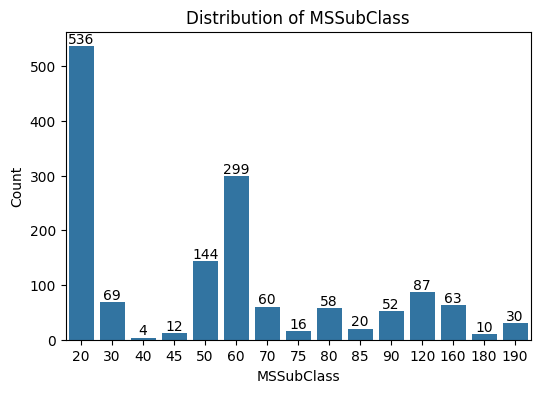

In [5]:
# create a figure and axis
fig, ax = plt.subplots(figsize=(6, 4))
# calculate the count of each value
MSSubClass_counts = data['MSSubClass'].value_counts().sort_index()
# draw the bar chart
sns.barplot(x = MSSubClass_counts.index, y = MSSubClass_counts.values)
# add title and labels
ax.set_title('Distribution of MSSubClass')
ax.set_xlabel('MSSubClass')
ax.set_ylabel('Count')
# add data labels on the top of the bars
for index, value in enumerate(MSSubClass_counts):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', color = 'black')
# display the plot
plt.show()

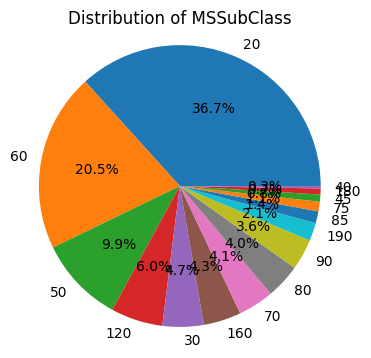

In [6]:
# create a figure and axis
fig, ax = plt.subplots(figsize=(4, 4))
# calculate the count of each value
MSSubClass_counts = data['MSSubClass'].value_counts()
# draw the pie chart
plt.pie(MSSubClass_counts, labels = MSSubClass_counts.index, autopct = '%1.1f%%', startangle = 0)
# add title
ax.set_title('Distribution of MSSubClass')
# display the plot
plt.axis('equal')
plt.show()

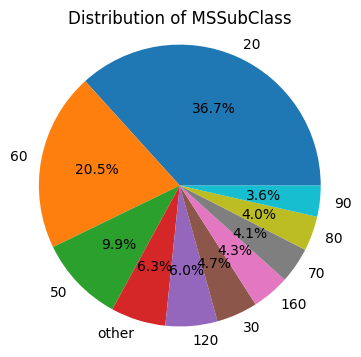

In [7]:
# create a copy of the original data
data_copy = data.copy()
# create a figure and axis
fig, ax = plt.subplots(figsize=(4, 4))
data_copy['MSSubClass'] = data_copy['MSSubClass'].apply(lambda x: 'other' if data['MSSubClass'].value_counts()[x]/len(data) < 0.03 else x)
# calculate the count of each value
MSSubClass_counts = data_copy['MSSubClass'].value_counts()
# draw the pie plot
plt.pie(MSSubClass_counts, labels = MSSubClass_counts.index, autopct = '%1.1f%%', startangle = 0)
# set the title
ax.set_title('Distribution of MSSubClass')
# display the plot
plt.axis('equal')
plt.show()
# release the memory
del data_copy

20	1-STORY 1946 & NEWER ALL STYLES \
30	1-STORY 1945 & OLDER \
40	1-STORY W/FINISHED ATTIC ALL AGES \
45	1-1/2 STORY - UNFINISHED ALL AGES \
50	1-1/2 STORY FINISHED ALL AGES \
60	2-STORY 1946 & NEWER \
70	2-STORY 1945 & OLDER \
75	2-1/2 STORY ALL AGES \
80	SPLIT OR MULTI-LEVEL \
85	SPLIT FOYER \
90	DUPLEX - ALL STYLES AND AGES \
120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER \
150	1-1/2 STORY PUD - ALL AGES \
160	2-STORY PUD - 1946 & NEWER \
180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER \
190	2 FAMILY CONVERSION - ALL STYLES AND AGES \
Half of the data belongs to 20 and 60 attributes, which means 1-2 STORY 1946 & NEWER

In [25]:
data_copy = data.copy()
data_copy['YearBuilt'] = data_copy['YearBuilt'].apply(lambda x: 'old' if x < 1946 else 'new')
data_copy.groupby(['YearBuilt', 'MSSubClass'])['MSSubClass'].count()

YearBuilt  MSSubClass
new        20            535
           30              1
           40              2
           45              3
           50             42
           60            299
           80             58
           85             20
           90             51
           120            87
           160            63
           180            10
           190             9
old        20              1
           30             68
           40              2
           45              9
           50            102
           70             60
           75             16
           90              1
           190            21
Name: MSSubClass, dtype: int64

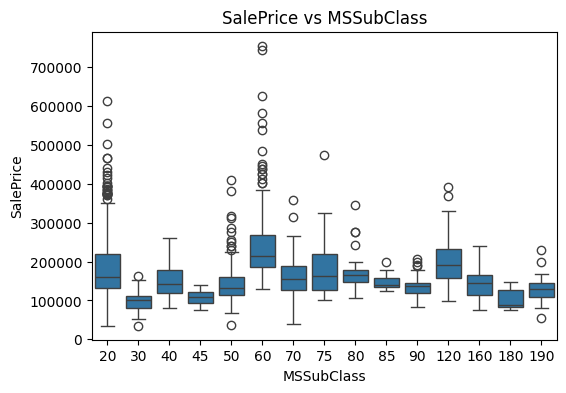

In [8]:
# create a figure
plt.figure(figsize=(6,4))
# draw the boxplot
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = data)
# add title and labels
plt.title('SalePrice vs MSSubClass')
plt.xlabel('MSSubClass')
plt.ylabel('SalePrice')
# display the plot
plt.show()

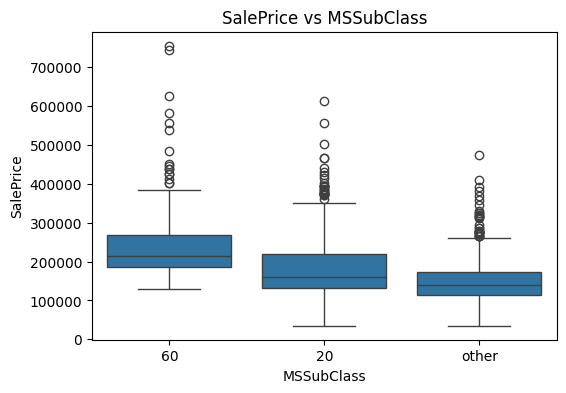

In [9]:
# create a copy of the original data
data_copy = data.copy()
# filter the data
data['MSSubClass_new'] = data_copy['MSSubClass'].apply(lambda x: '20' if x == 20 else ('60' if x == 60 else 'other'))
# create a new dataframe
filtered_data = data[['MSSubClass_new', 'SalePrice']]
# create a figure
plt.figure(figsize=(6, 4))
# draw the boxplot
sns.boxplot(x = 'MSSubClass_new', y = 'SalePrice', data = filtered_data)
# add title and labels
plt.title('SalePrice vs MSSubClass')
plt.xlabel('MSSubClass')
plt.ylabel('SalePrice')
# display the plot
plt.show()
# release the memory
del data_copy

In [10]:
# calculate the mean of each MSSubClass
mean_sale_price = data.groupby('MSSubClass')['SalePrice'].mean().round(1).sort_values(ascending=False)
print(mean_sale_price)
# create a copy of the original data
data_copy = data.copy()
# combine the value to find the most profitable MSSubClass
MSSubClass_corr = pd.DataFrame(columns = ['iter', 'corr'])
iter = 0
initial_corr = data_copy[['MSSubClass', 'SalePrice']].corr().iloc[0, 1]
MSSubClass_corr.loc[iter] = [iter, initial_corr]
for index, value in mean_sale_price.sort_values(ascending=True).items():
    iter += 1
    data_copy['MSSubClass'] = data_copy['MSSubClass'].replace({index: 0})
    corr_value = data_copy[['MSSubClass','SalePrice']].corr().iloc[0,1]
    MSSubClass_corr.loc[iter] = [iter, corr_value]
MSSubClass_corr['iter'] = MSSubClass_corr['iter'].astype(int)
MSSubClass_corr.set_index('iter', inplace=True)
print(MSSubClass_corr)
# release the memory
del data_copy
del MSSubClass_corr
del mean_sale_price
del initial_corr
del iter
del corr_value

MSSubClass
60     239948.5
120    200779.1
75     192437.5
20     185224.8
80     169736.6
70     166772.4
40     156125.0
85     147810.0
50     143303.0
160    138647.4
90     133541.1
190    129613.3
45     108591.7
180    102300.0
30      95829.7
Name: SalePrice, dtype: float64
          corr
iter          
0    -0.084284
1    -0.046853
2    -0.019332
3    -0.011360
4     0.052447
5     0.101017
6     0.238629
7     0.294607
8     0.311568
9     0.312172
10    0.329791
11    0.354357
12    0.312705
13    0.312993
14    0.377197
15         NaN


In [3]:
# calculate the mean of each MSSubClass
data_copy = data.copy()
# filter the data
data_copy['MSSubClass'] = data_copy['MSSubClass'].apply(lambda x: '1' if x in [20, 60, 120, 160] else 0)
# calculate the correlation
corr = data_copy[['MSSubClass', 'SalePrice']].corr().iloc[0, 1]
print(corr)
# release the memory
del data_copy
del corr

0.3501450839304753


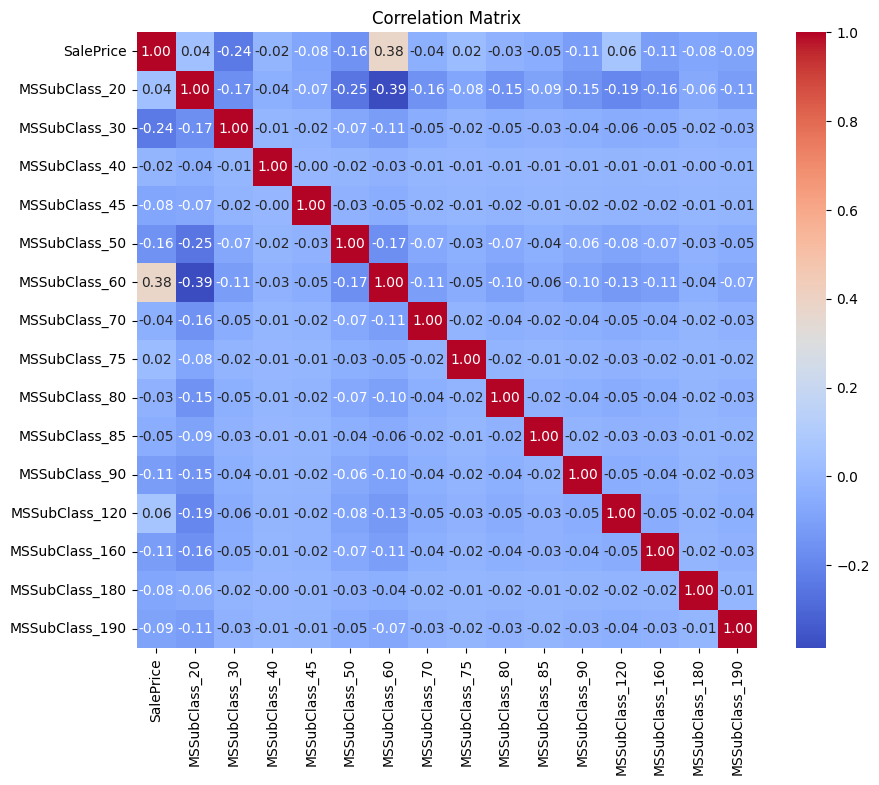

In [11]:
# check the multicollinearity
data_copy = data.copy()
data_copy['MSSubClass'] = data_copy['MSSubClass'].astype('category')
data_copy = pd.get_dummies(data_copy[['MSSubClass','SalePrice']], drop_first = False)
corr = data_copy.corr()
# create a figure
plt.figure(figsize=(10, 8))
# draw the heatmap
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = 'coolwarm')
# add title
plt.title('Correlation Matrix')
# display the plot
plt.show()
# release the memory
del data_copy
del corr

There's no obvious multicollinearity.

# 3
MSZoning

In [12]:
print(data['MSZoning'].value_counts())

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


In [16]:
# data.groupby(['MSZoning','MSSubClass'])['SalePrice'].agg(['count','mean','median','std'])

count           mean    median            std
MSZoning MSSubClass                                               
C (all)  20              2   45652.000000   45652.0   14624.382449
         30              2   57950.000000   57950.0   32597.622613
         50              4   91044.000000   93888.0   18022.452959
         70              1   40000.000000   40000.0            NaN
         190             1  133900.000000  133900.0            NaN
FV       20             13  226289.538462  222000.0   52545.629296
         60             25  248558.600000  250000.0   40808.975838
         120             5  226140.000000  199900.0   57669.168539
         160            22  164749.318182  166750.0   12342.805660
RH       20              3  102966.666667  107000.0   19269.232816
         30              1   79000.000000   79000.0            NaN
         45              1   76000.000000   76000.0            NaN
         50              1  159434.000000  159434.0            NaN
         70              3  124533.333333  130000.0   18805.672903
         90              3  144666.666667  145000.0     577.350269
         120             2  157000.000000  157000.0   33941.125497
         190             2  180000.000000  180000.0   28284.271247
RL       20            508  186467.039370  159697.5   78949.246792
         30             33   96481.212121   91000.0   26255.811114
         40              2  196500.000000  196500.0   89802.561211
         45              4  110050.000000  104350.0   17065.852845
         50             88  156277.477273  137725.0   61774.698609
         60            273  239544.457875  214000.0   89544.415544
         70             30  199808.733333  188850.0   56026.195199
         75              6  184750.000000  188250.0   41005.792274
         80             58  169736.551724  166500.0   38197.808771
         85             20  147810.000000  140750.0   19629.942220
         90             43  132379.906977  135960.0   27847.684089
         120            59  210029.491525  196000.0   54436.737955
         160            11  164909.090909  154000.0   33063.437648
         190            16  134662.500000  130250.0   34496.282408
RM       20             10  121327.500000  120000.0   19838.957361
         30             33   97983.969697  102000.0   22060.325928
         40              2  115750.000000  115750.0   51265.241636
         45              7  112414.285714  113000.0   20231.199385
         50             51  124698.039216  125500.0   32748.218212
         60              1  135000.000000  135000.0            NaN
         70             26  138403.192308  134750.0   36367.545857
         75             10  197050.000000  136750.0  125918.944387
         90              6  136300.000000  124750.0   35952.190476
         120            21  172920.952381  149300.0   61964.819205
         160            30  109876.666667  112500.0   20870.217740
         180            10  102300.000000   88500.0   29474.282575
         190            11  112718.181818  119900.0   30212.971326

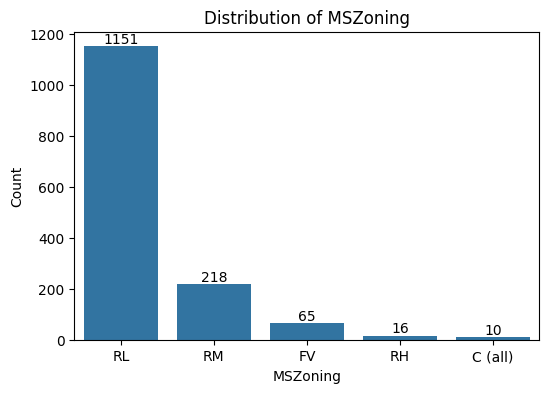

In [13]:
# create a figure and axis
fig, ax = plt.subplots(figsize=(6, 4))
# calculate the count of each value
MSZoning_counts = data['MSZoning'].value_counts().sort_values(ascending=False)
# draw the bar chart
sns.barplot(x = MSZoning_counts.index, y = MSZoning_counts.values)
# set the title and labels
ax.set_title('Distribution of MSZoning')
ax.set_xlabel('MSZoning')
ax.set_ylabel('Count')
# add data labels on the top of the bars
for index, value in enumerate(MSZoning_counts):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', color = 'black')
# display the plot
plt.show()
# release the memory
del MSZoning_counts

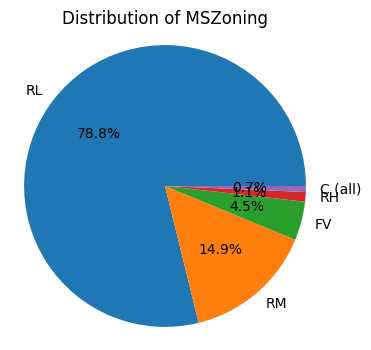

In [14]:
# create a figure and axis
plt.figure(figsize=(4, 4))
# calculate the percentage of each value
MSZoning_counts = data['MSZoning'].value_counts()
MSZoning_percent = MSZoning_counts / len(data)
# draw the pie plot
plt.pie(MSZoning_percent, labels = MSZoning_percent.index, autopct = "%1.1f%%", startangle = 0)
# add title
plt.title('Distribution of MSZoning')
# display the plot
plt.axis('equal')
plt.show()

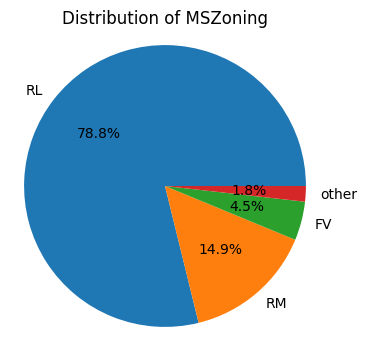

In [15]:
# create a figure
plt.figure(figsize=(4,4))
data_copy = data.copy()
# filter the data
data_copy['MSZoning'] = data_copy['MSZoning'].apply(lambda x: 'other' if data['MSZoning'].value_counts()[x]/len(data) < 0.03 else x)
# calculate the percentage of each value
MSZoning_counts = data_copy['MSZoning'].value_counts()
MSZoning_percent = MSZoning_counts / len(data)
# draw the pie plot
plt.pie(MSZoning_percent, labels = MSZoning_percent.index, autopct = "%1.1f%%", startangle = 0)
# add title
plt.title('Distribution of MSZoning')
# display the plot
plt.axis('equal')
plt.show()
# release the memory
del data_copy
del MSZoning_counts

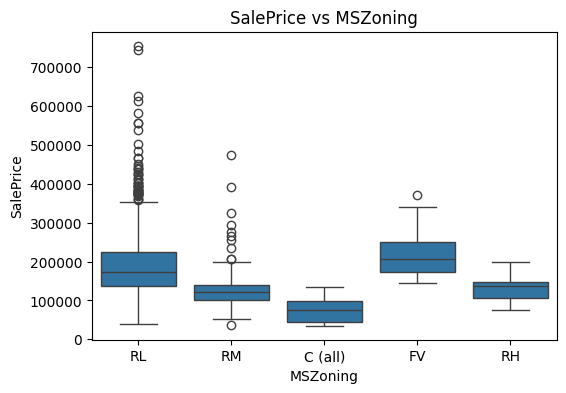

In [16]:
# create a figure
plt.figure(figsize=(6,4))
# draw the boxplot
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = data)
# add title and labels
plt.title('SalePrice vs MSZoning')
plt.xlabel('MSZoning')
plt.ylabel('SalePrice')
# display the plot
plt.show()

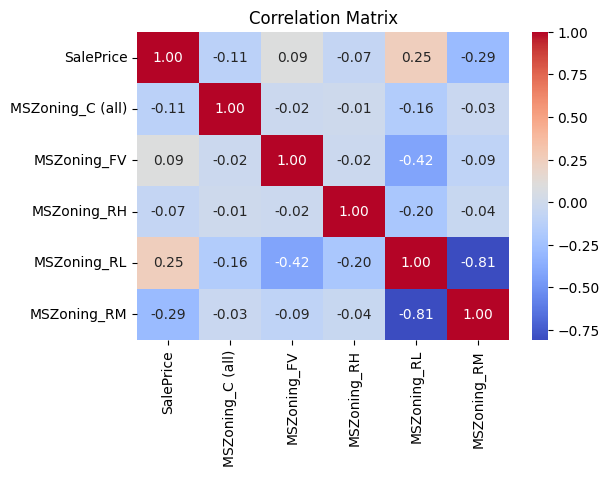

In [17]:
# check the multicollinearity
data_copy = data.copy()
data_copy = pd.get_dummies(data_copy[['MSZoning','SalePrice']], drop_first = False)
corr = data_copy.corr()
# create a figure
plt.figure(figsize=(6, 4))
# draw the heatmap
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = 'coolwarm')
# add title
plt.title('Correlation Matrix')
# display the plot
plt.show()
# release the memory
del data_copy
del corr

# 4
LotFrontage: There are 18% of missing value.

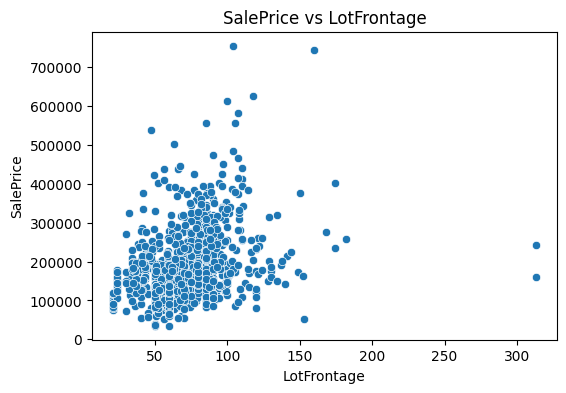

In [18]:
# create a figure
plt.figure(figsize=(6,4))
# draw the scatter plot
sns.scatterplot(data = data, x = 'LotFrontage', y = 'SalePrice')
# add title
plt.title('SalePrice vs LotFrontage')
# display the plot
plt.show()

In [19]:
# calculate the correlation
corr = data[['LotFrontage', 'SalePrice']].corr().iloc[0, 1]
print(corr)
# release the memory
del corr

0.35179909657067737


# 5
LotArea

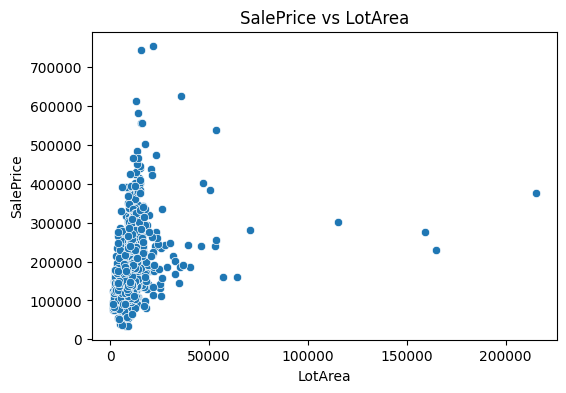

In [20]:
# create a figure
plt.figure(figsize=(6,4))
# draw the scatter plot
sns.scatterplot(data = data, x = 'LotArea', y = 'SalePrice')
# add title
plt.title('SalePrice vs LotArea')
# display the plot
plt.show()

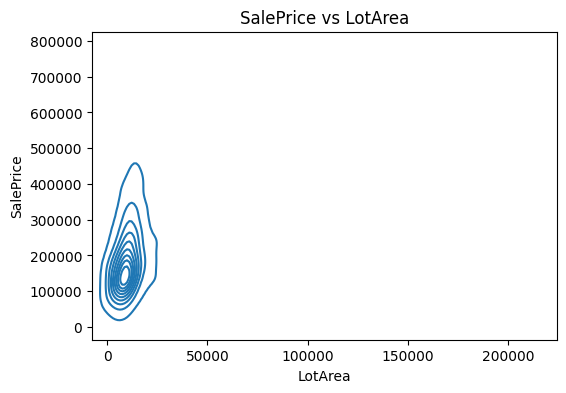

In [21]:
# create a figure
plt.figure(figsize=(6,4))
# draw the kde plot
sns.kdeplot(data = data, x = 'LotArea', y = 'SalePrice')
# add title
plt.title('SalePrice vs LotArea')
# display the plot
plt.show()

In [22]:
# calculate the correlation
corr = data[['LotArea', 'SalePrice']].corr().iloc[0, 1]
print(corr)
# release the memory
del corr

0.2638433538714051


# 6
Street

In [35]:
print(data['Street'].nunique(), data['Street'].value_counts())

2 Street
Pave    1454
Grvl       6
Name: count, dtype: int64


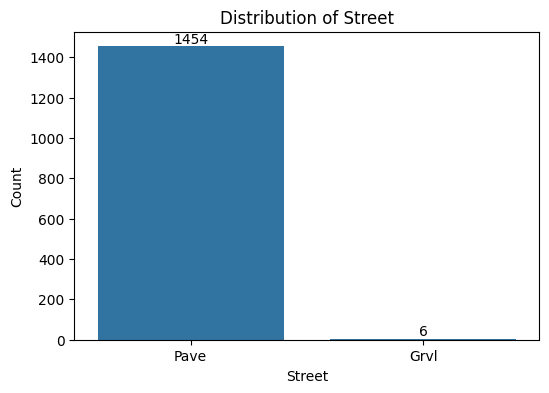

In [25]:
# create a figure
plt.figure(figsize=(6,4))
# calculate the count of each value
Street_counts = data['Street'].value_counts()
# draw the bar chart
sns.barplot(x = Street_counts.index, y = Street_counts.values)
# add title and labels
plt.title('Distribution of Street')
plt.xlabel('Street')
plt.ylabel('Count')
# add data labels on the top of the bars
for index, value in enumerate(Street_counts):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', color = 'black')
# display the plot
plt.show()
# release the memory
del Street_counts

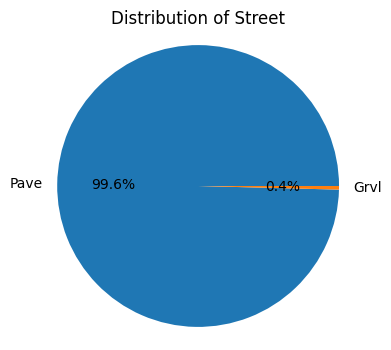

In [27]:
# create a figure
plt.figure(figsize=(4,4))
# calculate the percentage of each value
Street_counts = data['Street'].value_counts()
Street_percent = Street_counts / len(data)
# draw the pie plot
plt.pie(Street_percent, labels = Street_percent.index, autopct = "%1.1f%%", startangle = 0)
# add title
plt.title('Distribution of Street')
# display the plot
plt.axis('equal')
plt.show()
# release the memory
del Street_counts
del Street_percent

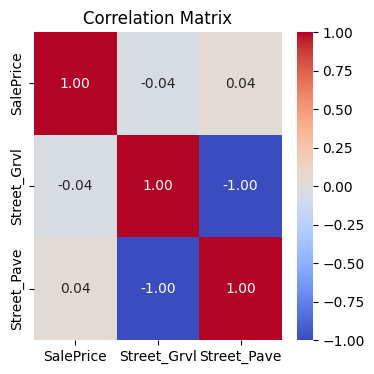

In [28]:
# check the multicollinearity
data_copy = data.copy()
data_copy = pd.get_dummies(data_copy[['Street','SalePrice']], drop_first = False)
corr = data_copy.corr()
# create a figure
plt.figure(figsize=(4, 4))
# draw the heatmap
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = 'coolwarm')
# add title
plt.title('Correlation Matrix')
# display the plot
plt.show()
# release the memory
del data_copy
del corr

We should convert this attribute to a 0, 1 binary attribute.

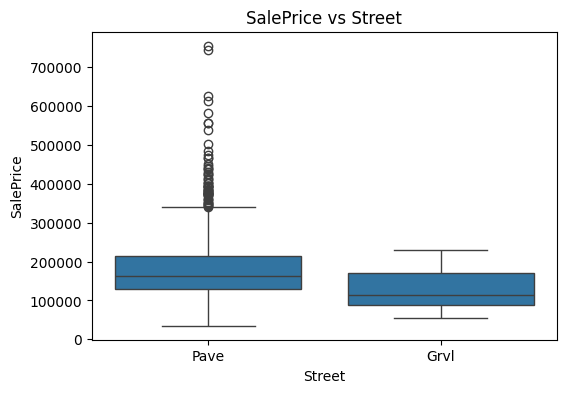

In [32]:
# create a figure
plt.figure(figsize=(6,4))
# draw the box plot
sns.boxplot(x = 'Street', y = 'SalePrice', data = data)
# add title and labels
plt.title('SalePrice vs Street')
plt.xlabel('Street')
plt.ylabel('SalePrice')
# display the plot
plt.show()

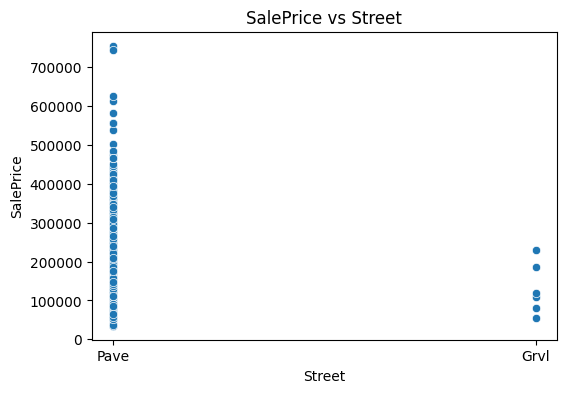

In [36]:
# create a figure
plt.figure(figsize=(6,4))
# draw the scatter plot
sns.scatterplot(data = data, x = 'Street', y = 'SalePrice')
# add title
plt.title('SalePrice vs Street')
# display the plot
plt.show()

# 7
Alley

In [39]:
print(data['Alley'].nunique(), data['Alley'].value_counts())

2 Alley
Grvl    50
Pave    41
Name: count, dtype: int64


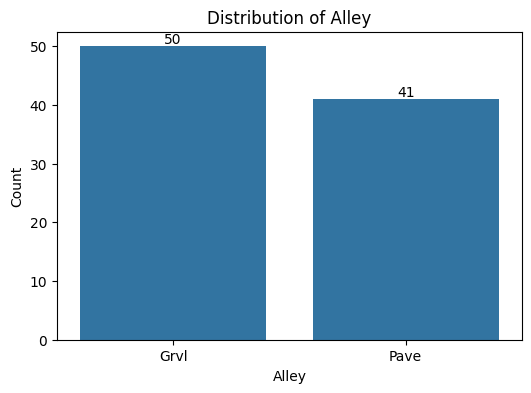

In [59]:
# create a figure
plt.figure(figsize=(6,4))
# calculate the count of each value
Alley_counts = data['Alley'].value_counts()
# draw the bar chart
sns.barplot(x = Alley_counts.index, y = Alley_counts.values)
# add title and labels
plt.title('Distribution of Alley')
plt.xlabel('Alley')
plt.ylabel('Count')
# add data labels on the top of the bars
for index, value in enumerate(Alley_counts):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', color = 'black')
# display the plot
plt.show()
# release the memory
del Alley_counts

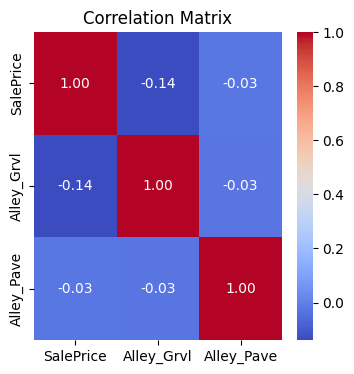

In [31]:
# check the multicollinearity
data_copy = data.copy()
data_copy = pd.get_dummies(data_copy[['Alley','SalePrice']], drop_first = False)
corr = data_copy.corr()
# create a figure
plt.figure(figsize=(4, 4))
# draw the heatmap
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = 'coolwarm')
# add title
plt.title('Correlation Matrix')
# display the plot
plt.show()
# release the memory
del data_copy
del corr

In [56]:
# customer change the value of the column
data_copy = data.copy()
data_copy['Alley'] = data_copy['Alley'].apply(lambda x: 0 if pd.isna(x) else 1)
print(data_copy[['Alley', 'SalePrice']].corr().iloc[0, 1])
# release the memory
del data_copy

-0.12361124617957113


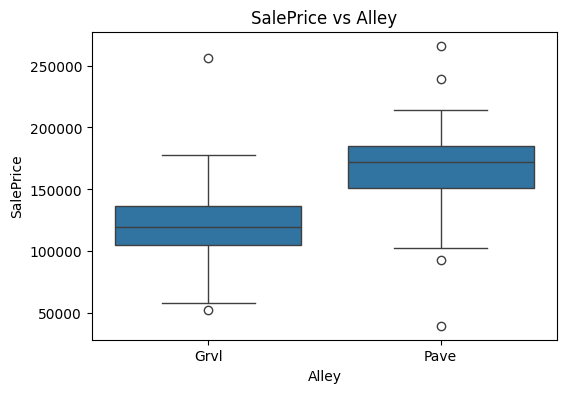

In [57]:
# create a figure
plt.figure(figsize=(6,4))
# draw the box plot
sns.boxplot(x = 'Alley', y = 'SalePrice', data = data)
# add title and labels
plt.title('SalePrice vs Alley')
plt.xlabel('Alley')
plt.ylabel('SalePrice')
# display the plot
plt.show()

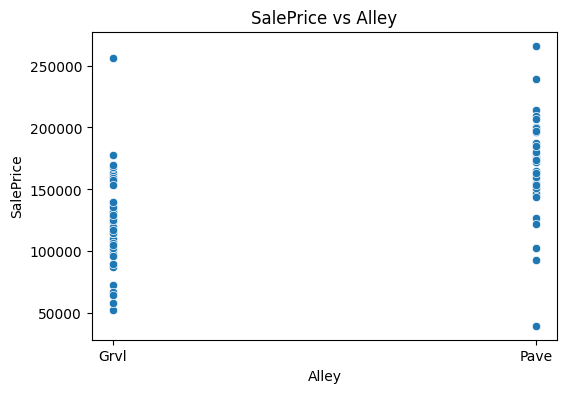

In [58]:
# create a figure
plt.figure(figsize=(6,4))
# draw the scatter plot
sns.scatterplot(data = data, x = 'Alley', y = 'SalePrice')
# add title
plt.title('SalePrice vs Alley')
# display the plot
plt.show()

In [60]:
# customer change the value of the column
data_copy = data.copy()
data_copy['Alley'] = data_copy['Alley'].apply(lambda x: 0 if pd.isna(x) else (1 if x == 'Grvl' else 2))
print(data_copy[['Alley', 'SalePrice']].corr().iloc[0, 1])
# release the memory
del data_copy

-0.09260744997351616


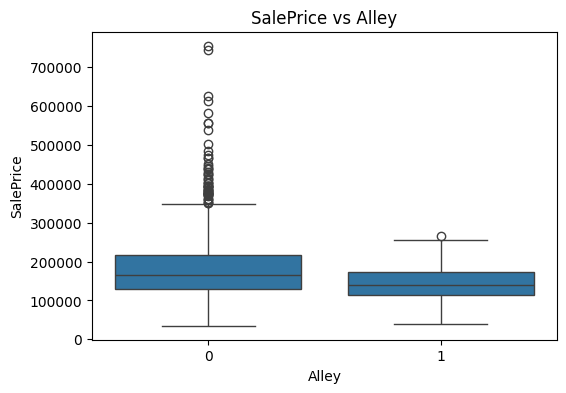

In [61]:
# create a figure
plt.figure(figsize=(6,4))
data_copy = data.copy()
# filter the data
data_copy['Alley'] = data_copy['Alley'].apply(lambda x: '0' if pd.isna(x) else '1')
# draw the box plot
sns.boxplot(x = 'Alley', y = 'SalePrice', data = data_copy)
# add title and labels
plt.title('SalePrice vs Alley')
plt.xlabel('Alley')
plt.ylabel('SalePrice')
# display the plot
plt.show()
# release the memory
del data_copy

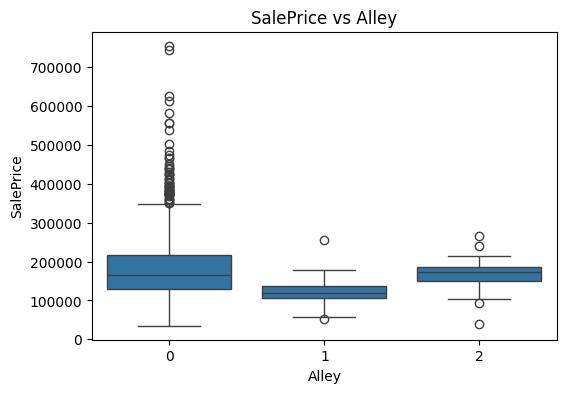

In [62]:
# create a figure
plt.figure(figsize=(6,4))
# filter the data
data_copy = data.copy()
data_copy['Alley'] = data_copy['Alley'].apply(lambda x: '0' if pd.isna(x) else ('1' if x == 'Grvl' else '2'))
# draw the box plot
sns.boxplot(x = 'Alley', y = 'SalePrice', data = data_copy)
# add title and labels
plt.title('SalePrice vs Alley')
plt.xlabel('Alley')
plt.ylabel('SalePrice')
# display the plot
plt.show()
# release the memory
del data_copy

# 8
LotShape

In [64]:
print(data['LotShape'].nunique(), data['LotShape'].value_counts())

4 LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64


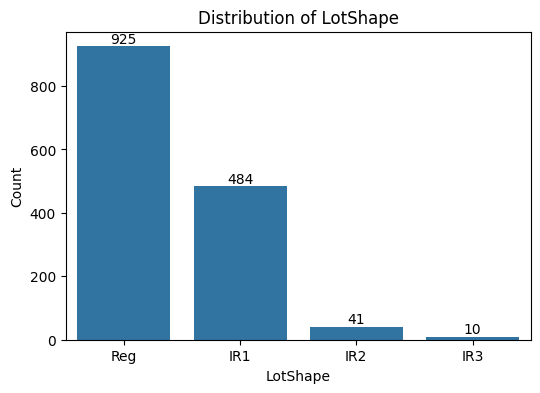

In [65]:
# create a figure
plt.figure(figsize=(6,4))
# calculate the count of each value
LotShape_counts = data['LotShape'].value_counts()
# draw the bar chart
sns.barplot(x = LotShape_counts.index, y = LotShape_counts.values)
# add title and labels
plt.title('Distribution of LotShape')
plt.xlabel('LotShape')
plt.ylabel('Count')
# add data labels on the top of the bars
for index, value in enumerate(LotShape_counts):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', color = 'black')
# display the plot
plt.show()
# release the memory
del LotShape_counts

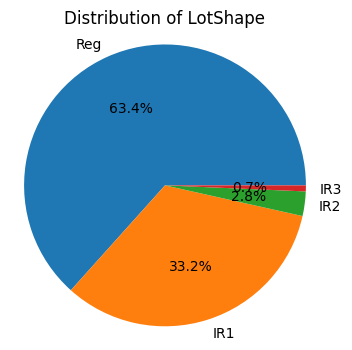

In [67]:
# create a figure
plt.figure(figsize=(4,4))
# calculate the percentage of each value
LotShape_counts = data['LotShape'].value_counts()
LotShape_percent = LotShape_counts / len(data)
# draw the pie plot
plt.pie(LotShape_percent, labels = LotShape_percent.index, autopct = "%1.1f%%", startangle = 0)
# add title
plt.title('Distribution of LotShape')
# display the plot
plt.axis('equal')
plt.show()
# release the memory
del LotShape_counts
del LotShape_percent

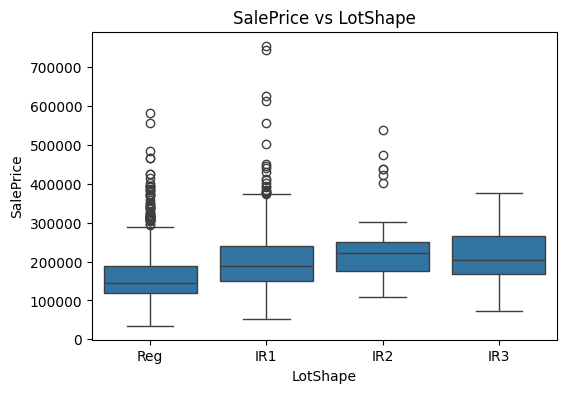

In [68]:
# create a figure
plt.figure(figsize=(6,4))
# draw the box plot
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = data)
# add title and labels
plt.title('SalePrice vs LotShape')
plt.xlabel('LotShape')
plt.ylabel('SalePrice')
# display the plot
plt.show()

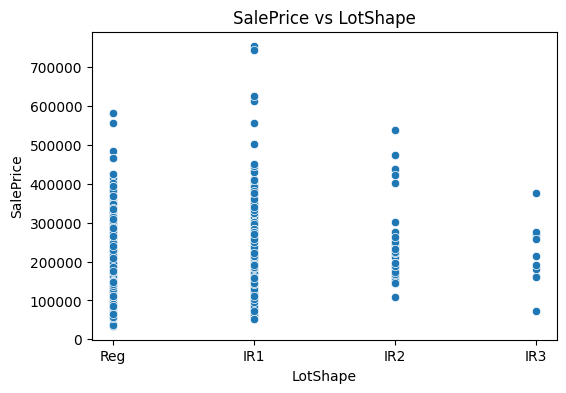

In [69]:
# create a figure
plt.figure(figsize=(6,4))
# draw the scatter plot
sns.scatterplot(data = data, x = 'LotShape', y = 'SalePrice')
# add title
plt.title('SalePrice vs LotShape')
# display the plot
plt.show()

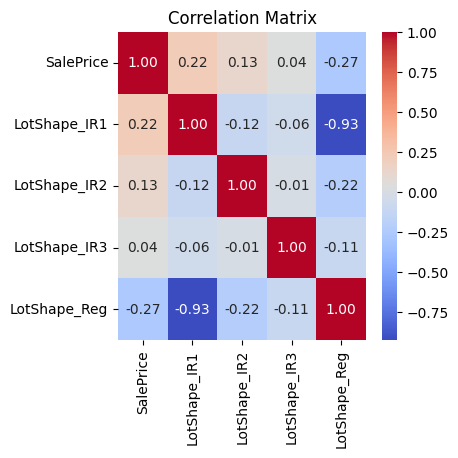

In [70]:
# check the multicollinearity
data_copy = data.copy()
data_copy = pd.get_dummies(data_copy[['LotShape','SalePrice']], drop_first = False)
corr = data_copy.corr()
# create a figure
plt.figure(figsize=(4, 4))
# draw the heatmap
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = 'coolwarm')
# add title
plt.title('Correlation Matrix')
# display the plot
plt.show()
# release the memory
del data_copy
del corr

# 9
LandContour

In [72]:
print(data['LandContour'].nunique(), '\n', data['LandContour'].value_counts())

4 
 LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64


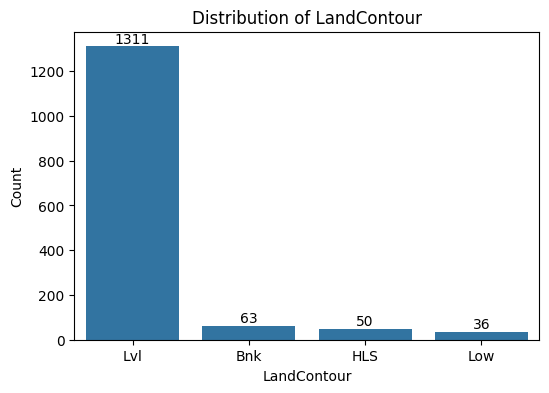

In [73]:
# create a figure
plt.figure(figsize=(6,4))
# calculate the count of each value
LandContour_counts = data['LandContour'].value_counts()
# draw the bar chart
sns.barplot(x = LandContour_counts.index, y = LandContour_counts.values)
# add title and labels
plt.title('Distribution of LandContour')
plt.xlabel('LandContour')
plt.ylabel('Count')
# add data labels on the top of the bars
for index, value in enumerate(LandContour_counts):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', color = 'black')
# display the plot
plt.show()
# release the memory
del LandContour_counts

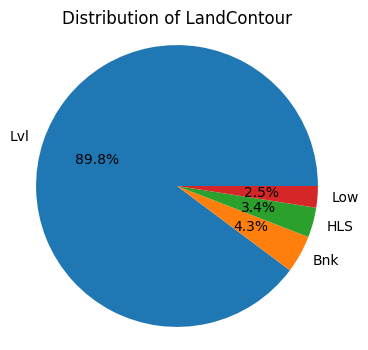

In [74]:
# create a figure
plt.figure(figsize=(4,4))
# calculate the percentage of each value
LandContour_counts = data['LandContour'].value_counts()
LandContour_percent = LandContour_counts / len(data)
# draw the pie plot
plt.pie(LandContour_percent, labels = LandContour_percent.index, autopct = "%1.1f%%", startangle = 0)
# add title
plt.title('Distribution of LandContour')
# display the plot
plt.axis('equal')
plt.show()
# release the memory
del LandContour_counts
del LandContour_percent

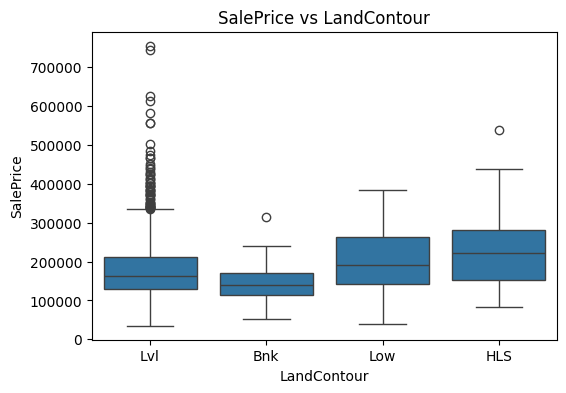

In [75]:
# create a figure
plt.figure(figsize=(6,4))
# draw the box plot
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = data)
# add title and labels
plt.title('SalePrice vs LandContour')
plt.xlabel('LandContour')
plt.ylabel('SalePrice')
# display the plot
plt.show()

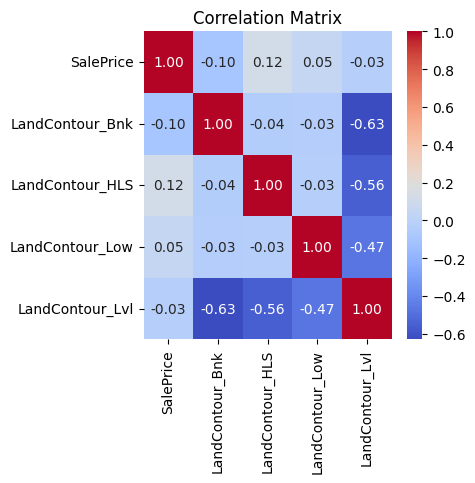

In [76]:
# create a figure
plt.figure(figsize=(4,4))
# check the multicollinearity
data_copy = data.copy()
data_copy = pd.get_dummies(data_copy[['LandContour','SalePrice']], drop_first = False)
corr = data_copy.corr()
# draw the heatmap
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = 'coolwarm')
# add title
plt.title('Correlation Matrix')
# display the plot
plt.show()
# release the memory
del data_copy
del corr

# 10
Utilities

In [77]:
print(data['Utilities'].nunique(), '\n', data['Utilities'].value_counts())

2 
 Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64


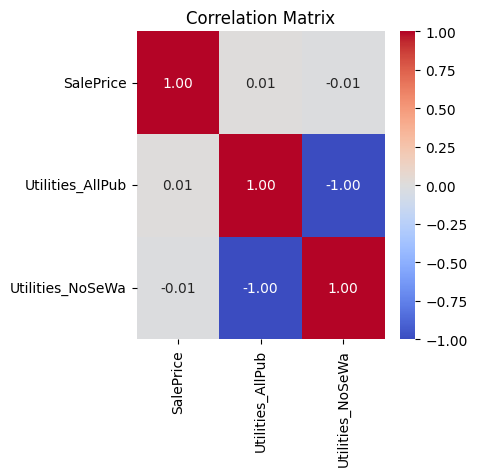

In [78]:
# check the multicollinearity
data_copy = data.copy()
data_copy = pd.get_dummies(data_copy[['Utilities','SalePrice']], drop_first = False)
corr = data_copy.corr()
# create a figure
plt.figure(figsize=(4, 4))
# draw the heatmap
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = 'coolwarm')
# add title
plt.title('Correlation Matrix')
# display the plot
plt.show()
# release the memory
del data_copy
del corr

# 11
LotConfig

In [79]:
print(data['LotConfig'].nunique(), '\n', data['LotConfig'].value_counts())

5 
 LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64


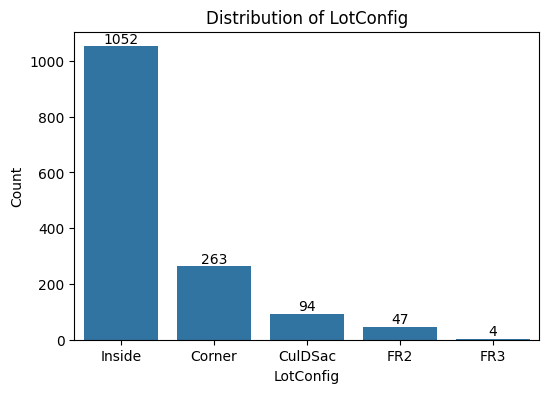

In [80]:
# create a figure
plt.figure(figsize=(6,4))
# calculate the count of each value
LotConfig_counts = data['LotConfig'].value_counts()
# draw the bar chart
sns.barplot(x = LotConfig_counts.index, y = LotConfig_counts.values)
# add title and labels
plt.title('Distribution of LotConfig')
plt.xlabel('LotConfig')
plt.ylabel('Count')
# add data labels on the top of the bars
for index, value in enumerate(LotConfig_counts):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', color = 'black')
# display the plot
plt.show()
# release the memory
del LotConfig_counts

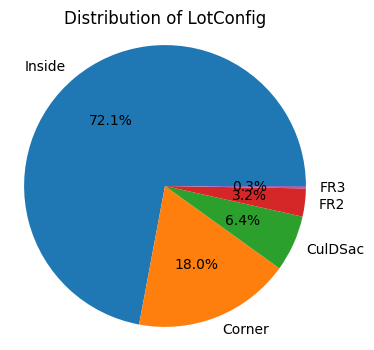

In [81]:
# create a figure
plt.figure(figsize=(4,4))
# calculate the percentage of each value
LotConfig_counts = data['LotConfig'].value_counts()
LotConfig_percent = LotConfig_counts / len(data)
# draw the pie plot
plt.pie(LotConfig_percent, labels = LotConfig_percent.index, autopct = "%1.1f%%", startangle = 0)
# add title
plt.title('Distribution of LotConfig')
# display the plot
plt.axis('equal')
plt.show()
# release the memory
del LotConfig_counts
del LotConfig_percent

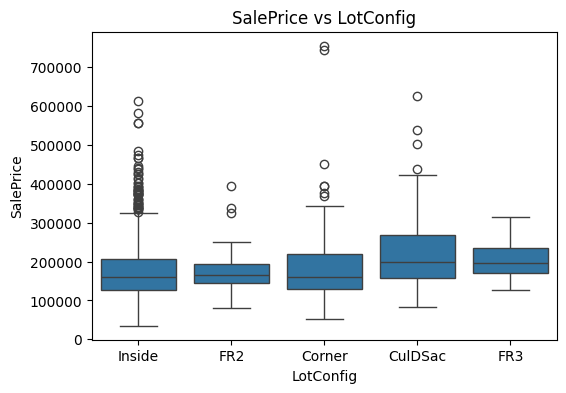

In [82]:
# create a figure
plt.figure(figsize=(6,4))
# draw the box plot
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = data)
# add title and labels
plt.title('SalePrice vs LotConfig')
plt.xlabel('LotConfig')
plt.ylabel('SalePrice')
# display the plot
plt.show()

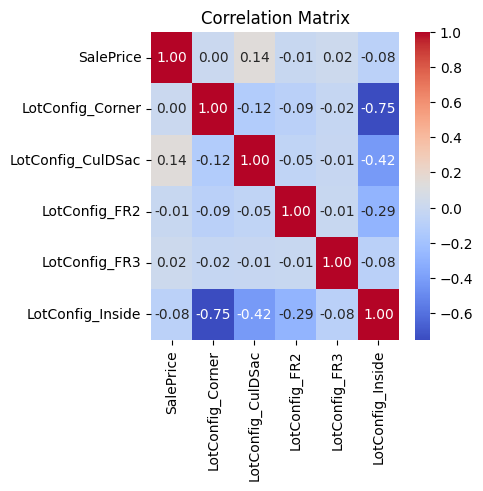

In [83]:
# check the multicollinearity
data_copy = data.copy()
data_copy = pd.get_dummies(data_copy[['LotConfig','SalePrice']], drop_first = False)
corr = data_copy.corr()
# create a figure
plt.figure(figsize=(4, 4))
# draw the heatmap
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = 'coolwarm')
# add title
plt.title('Correlation Matrix')
# display the plot
plt.show()
# release the memory
del data_copy
del corr

# 12
LandSlope

In [84]:
print(data['LandSlope'].nunique(), '\n', data['LandSlope'].value_counts())

3 
 LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64


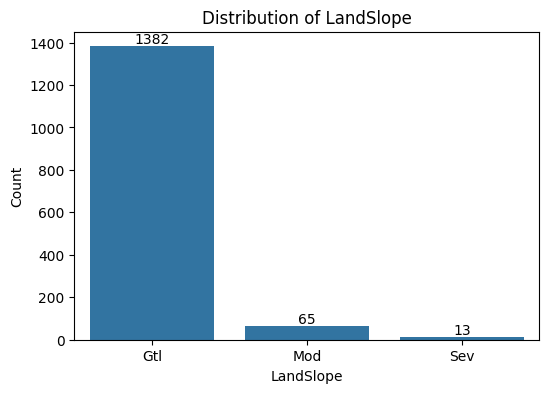

In [85]:
# create a figure
plt.figure(figsize=(6,4))
# calculate the count of each value
LandSlope_counts = data['LandSlope'].value_counts()
# draw the bar chart
sns.barplot(x = LandSlope_counts.index, y = LandSlope_counts.values)
# add title and labels
plt.title('Distribution of LandSlope')
plt.xlabel('LandSlope')
plt.ylabel('Count')
# add data labels on the top of the bars
for index, value in enumerate(LandSlope_counts):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', color = 'black')
# display the plot
plt.show()
# release the memory
del LandSlope_counts

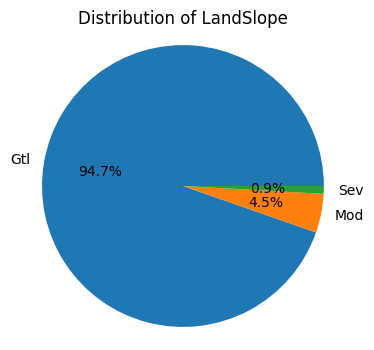

In [86]:
# create a figure
plt.figure(figsize=(4,4))
# calculate the percentage of each value
LandSlope_counts = data['LandSlope'].value_counts()
LandSlope_percent = LandSlope_counts / len(data)
# draw the pie plot
plt.pie(LandSlope_percent, labels = LandSlope_percent.index, autopct = "%1.1f%%", startangle = 0)
# add title
plt.title('Distribution of LandSlope')
# display the plot
plt.axis('equal')
plt.show()
# release the memory
del LandSlope_counts
del LandSlope_percent

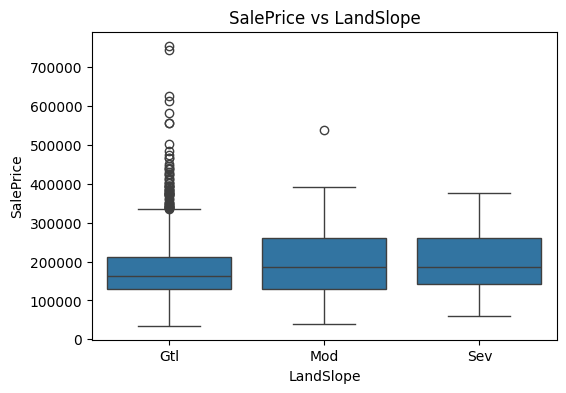

In [87]:
# create a figure
plt.figure(figsize=(6,4))
# draw the box plot
sns.boxplot(x = 'LandSlope', y = 'SalePrice', data = data)
# add title and labels
plt.title('SalePrice vs LandSlope')
plt.xlabel('LandSlope')
plt.ylabel('SalePrice')
# display the plot
plt.show()

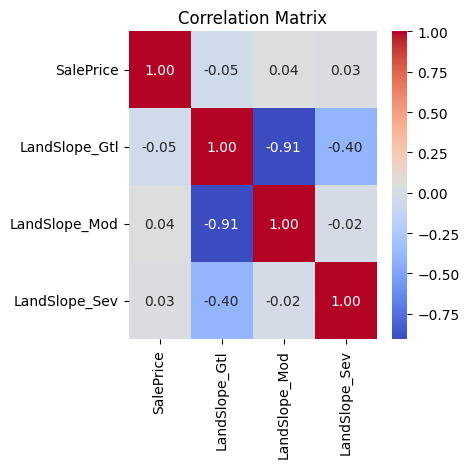

In [88]:
# check the multicollinearity
data_copy = data.copy()
data_copy = pd.get_dummies(data_copy[['LandSlope','SalePrice']], drop_first = False)
corr = data_copy.corr()
# create a figure
plt.figure(figsize=(4, 4))
# draw the heatmap
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = 'coolwarm')
# add title
plt.title('Correlation Matrix')
# display the plot
plt.show()
# release the memory
del data_copy
del corr

# 13
Neighborhood

In [89]:
print(data['Neighborhood'].nunique(), '\n', data['Neighborhood'].value_counts())

25 
 Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64


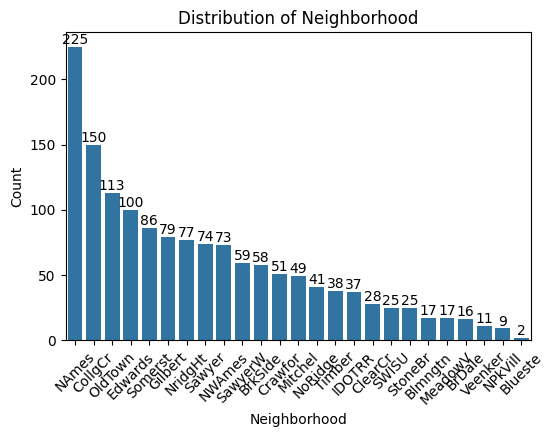

In [91]:
# create a figure
plt.figure(figsize=(6,4))
# calculate the count of each value
Neighborhood_counts = data['Neighborhood'].value_counts()
# draw the bar chart
sns.barplot(x = Neighborhood_counts.index, y = Neighborhood_counts.values)
# add title and labels
plt.title('Distribution of Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
# add data labels on the top of the bars
for index, value in enumerate(Neighborhood_counts):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', color = 'black')
# rotate the x-axis labels
plt.xticks(rotation = 45)
# display the plot
plt.show()
# release the memory
del Neighborhood_counts

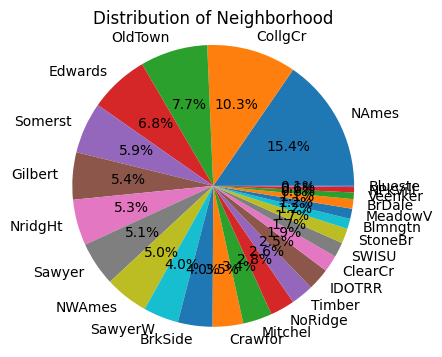

In [92]:
# create a figure
plt.figure(figsize=(4,4))
# calculate the percentage of each value
Neighborhood_counts = data['Neighborhood'].value_counts()
Neighborhood_percent = Neighborhood_counts / len(data)
# draw the pie plot
plt.pie(Neighborhood_percent, labels = Neighborhood_percent.index, autopct = "%1.1f%%", startangle = 0)
# add title
plt.title('Distribution of Neighborhood')
# display the plot
plt.axis('equal')
plt.show()
# release the memory
del Neighborhood_counts
del Neighborhood_percent

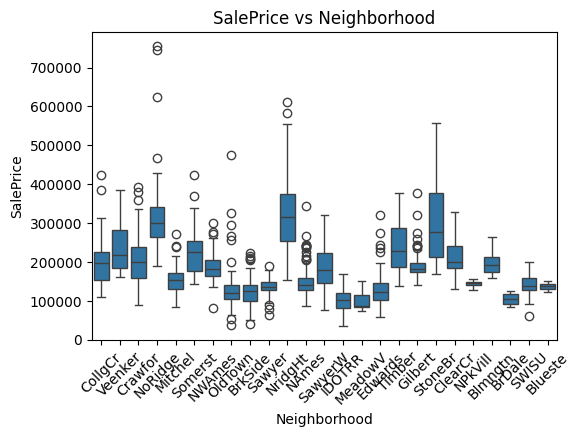

In [93]:
# create a figure
plt.figure(figsize=(6,4))
# draw the box plot
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = data)
# add title and labels
plt.title('SalePrice vs Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
# rotate the x-axis labels
plt.xticks(rotation = 45)
# display the plot
plt.show()

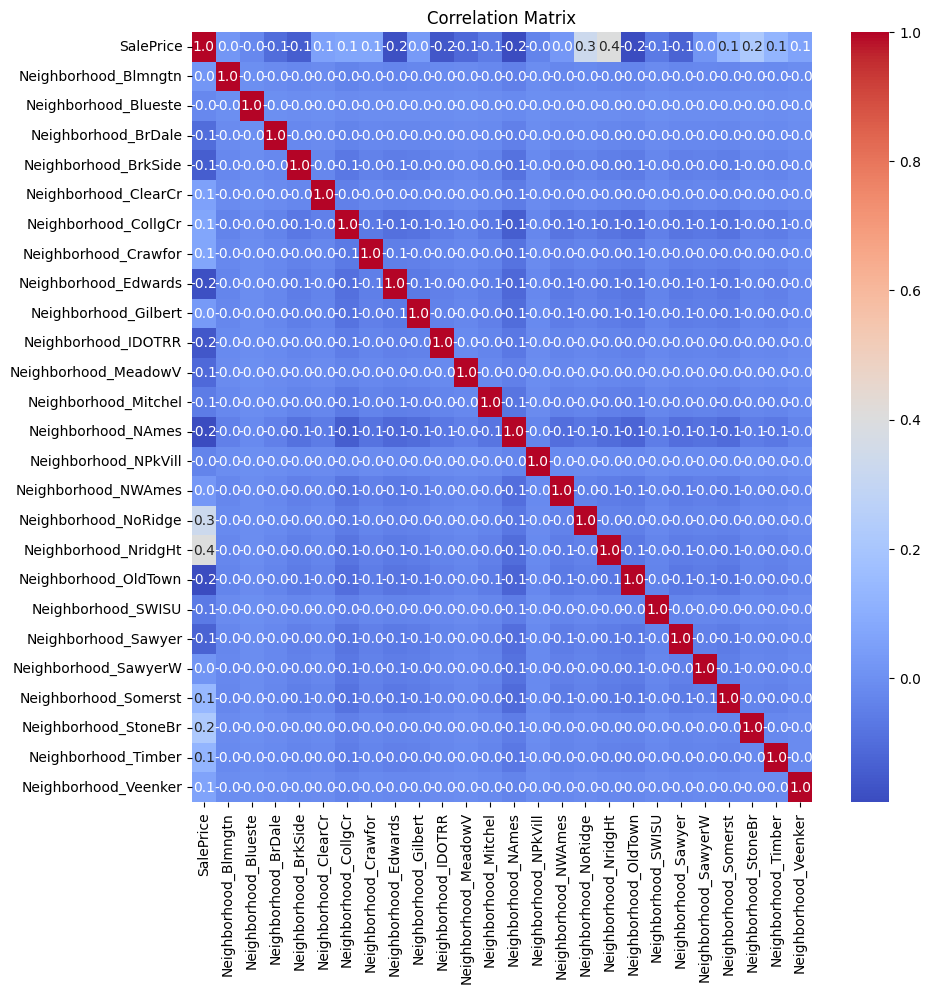

In [98]:
# check the multicollinearity
data_copy = data.copy()
data_copy = pd.get_dummies(data_copy[['Neighborhood','SalePrice']], drop_first = False)
corr = data_copy.corr()
# create a figure
plt.figure(figsize=(10, 10))
# draw the heatmap
sns.heatmap(corr, annot = True, fmt = ".1f", cmap = 'coolwarm')
# add title
plt.title('Correlation Matrix')
# display the plot
plt.show()
# release the memory
del data_copy
del corr

# 14
Condition1

In [99]:
print(data['Condition1'].nunique(), '\n', data['Condition1'].value_counts())

9 
 Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64


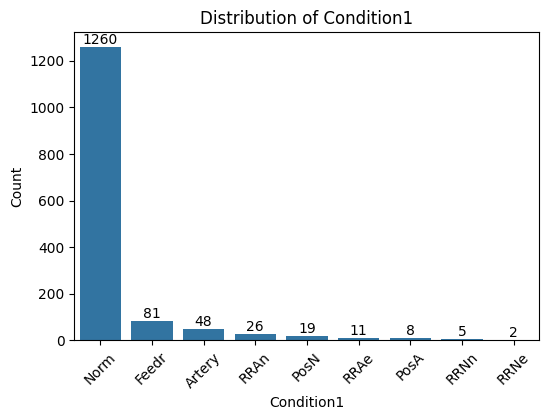

In [100]:
# create a figure
plt.figure(figsize=(6,4))
# calculate the count of each value
Condition1_counts = data['Condition1'].value_counts()
# draw the bar chart
sns.barplot(x = Condition1_counts.index, y = Condition1_counts.values)
# add title and labels
plt.title('Distribution of Condition1')
plt.xlabel('Condition1')
plt.ylabel('Count')
# add data labels on the top of the bars
for index, value in enumerate(Condition1_counts):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', color = 'black')
# rotate the x-axis labels
plt.xticks(rotation = 45)
# display the plot
plt.show()
# release the memory
del Condition1_counts

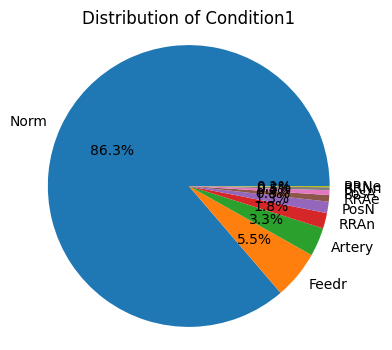

In [101]:
# create a figure
plt.figure(figsize=(4,4))
# calculate the percentage of each value
Condition1_counts = data['Condition1'].value_counts()
Condition1_percent = Condition1_counts / len(data)
# draw the pie plot
plt.pie(Condition1_percent, labels = Condition1_percent.index, autopct = "%1.1f%%", startangle = 0)
# add title
plt.title('Distribution of Condition1')
# display the plot
plt.axis('equal')
plt.show()
# release the memory
del Condition1_counts
del Condition1_percent

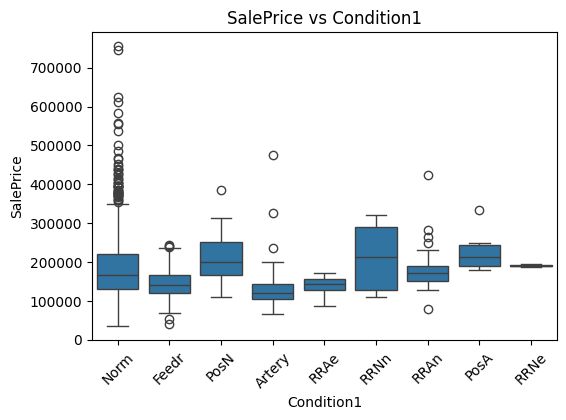

In [102]:
# create a figure
plt.figure(figsize=(6,4))
# draw the box plot
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = data)
# add title and labels
plt.title('SalePrice vs Condition1')
plt.xlabel('Condition1')
plt.ylabel('SalePrice')
# rotate the x-axis labels
plt.xticks(rotation = 45)
# display the plot
plt.show()

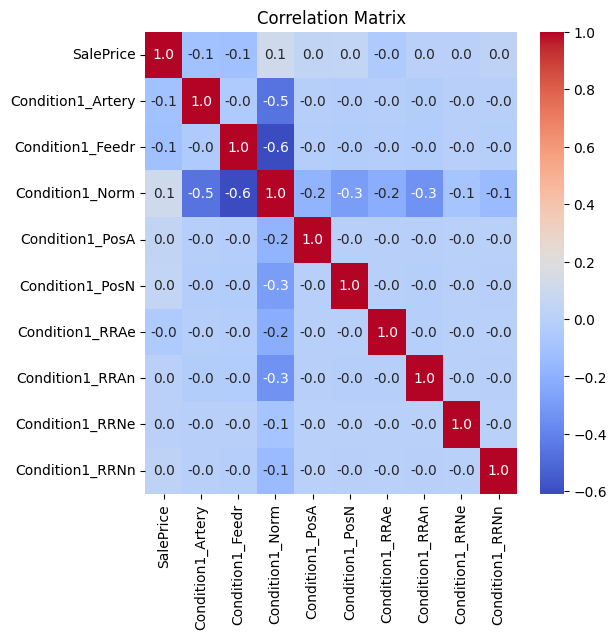

In [104]:
# check the multicollinearity
data_copy = data.copy()
data_copy = pd.get_dummies(data_copy[['Condition1','SalePrice']], drop_first = False)
corr = data_copy.corr()
# create a figure
plt.figure(figsize=(6, 6))
# draw the heatmap
sns.heatmap(corr, annot = True, fmt = ".1f", cmap = 'coolwarm')
# add title
plt.title('Correlation Matrix')
# display the plot
plt.show()
# release the memory
del data_copy
del corr

# 15
Condition2

In [105]:
print(data['Condition2'].nunique(), '\n', data['Condition2'].value_counts())

8 
 Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64


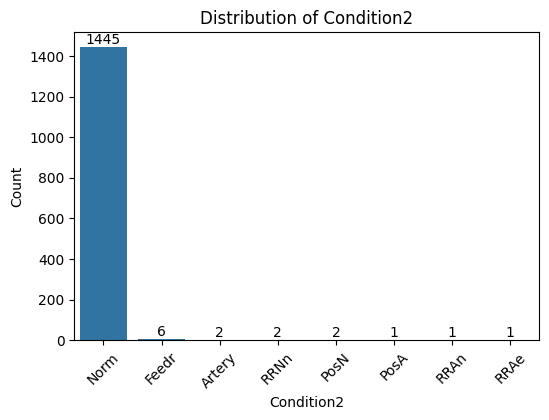

In [106]:
# create a figure
plt.figure(figsize=(6,4))
# calculate the count of each value
Condition2_counts = data['Condition2'].value_counts()
# draw the bar chart
sns.barplot(x = Condition2_counts.index, y = Condition2_counts.values)
# add title and labels
plt.title('Distribution of Condition2')
plt.xlabel('Condition2')
plt.ylabel('Count')
# add data labels on the top of the bars
for index, value in enumerate(Condition2_counts):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', color = 'black')
# rotate the x-axis labels
plt.xticks(rotation = 45)
# display the plot
plt.show()
# release the memory
del Condition2_counts

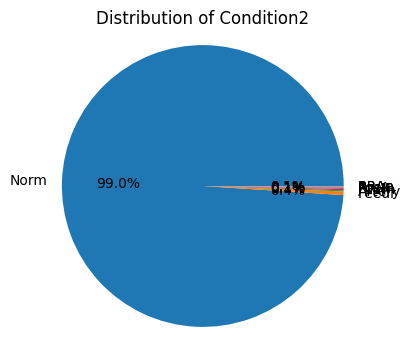

In [107]:
# create a figure
plt.figure(figsize=(4,4))
# calculate the percentage of each value
Condition2_counts = data['Condition2'].value_counts()
Condition2_percent = Condition2_counts / len(data)
# draw the pie plot
plt.pie(Condition2_percent, labels = Condition2_percent.index, autopct = "%1.1f%%", startangle = 0)
# add title
plt.title('Distribution of Condition2')
# display the plot
plt.axis('equal')
plt.show()
# release the memory
del Condition2_counts
del Condition2_percent

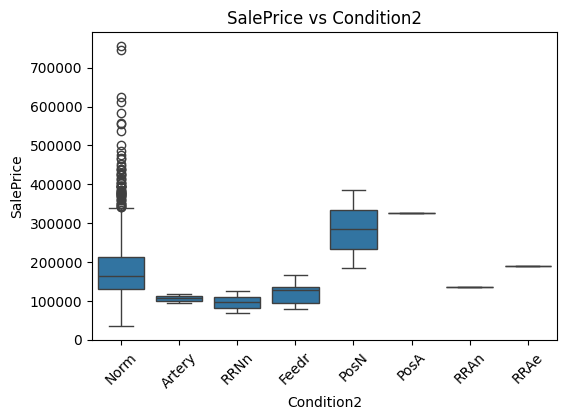

In [109]:
# create a figure
plt.figure(figsize=(6,4))
# draw the box plot
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = data)
# add title and labels
plt.title('SalePrice vs Condition2')
plt.xlabel('Condition2')
plt.ylabel('SalePrice')
# rotate the x-axis labels
plt.xticks(rotation = 45)
# display the plot
plt.show()

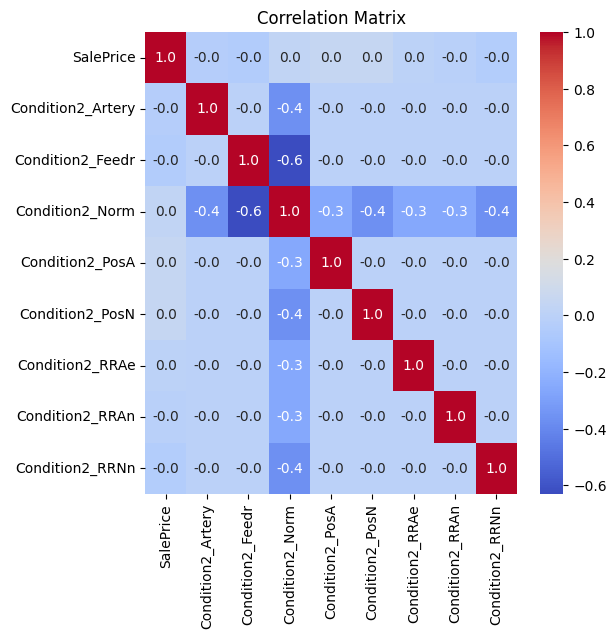

In [110]:
# check the multicollinearity
data_copy = data.copy()
data_copy = pd.get_dummies(data_copy[['Condition2','SalePrice']], drop_first = False)
corr = data_copy.corr()
# create a figure
plt.figure(figsize=(6, 6))
# draw the heatmap
sns.heatmap(corr, annot = True, fmt = ".1f", cmap = 'coolwarm')
# add title
plt.title('Correlation Matrix')
# display the plot
plt.show()
# release the memory
del data_copy
del corr

# 16
BldgType

In [111]:
print(data['BldgType'].nunique(), '\n', data['BldgType'].value_counts())

5 
 BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64


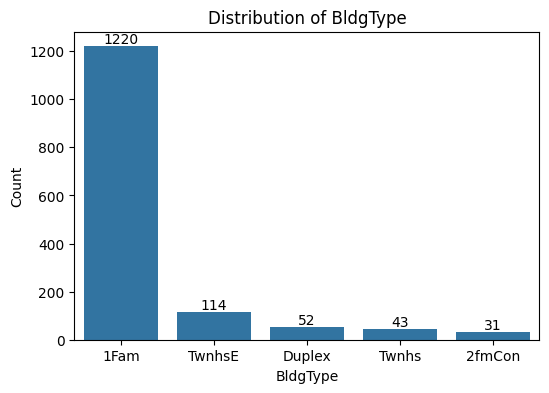

In [113]:
# create a figure
plt.figure(figsize=(6,4))
# calculate the count of each value
BldgType_counts = data['BldgType'].value_counts()
# draw the bar chart
sns.barplot(x = BldgType_counts.index, y = BldgType_counts.values)
# add title and labels
plt.title('Distribution of BldgType')
plt.xlabel('BldgType')
plt.ylabel('Count')
# add data labels on the top of the bars
for index, value in enumerate(BldgType_counts):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', color = 'black')
# display the plot
plt.show()
# release the memory
del BldgType_counts

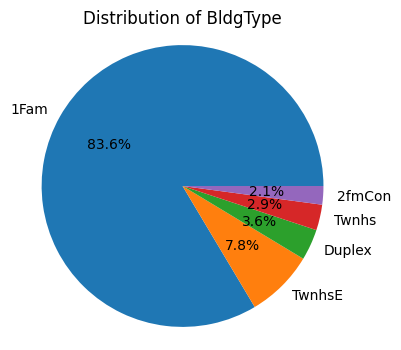

In [114]:
# create a figure
plt.figure(figsize=(4,4))
# calculate the percentage of each value
BldgType_counts = data['BldgType'].value_counts()
BldgType_percent = BldgType_counts / len(data)
# draw the pie plot
plt.pie(BldgType_percent, labels = BldgType_percent.index, autopct = "%1.1f%%", startangle = 0)
# add title
plt.title('Distribution of BldgType')
# display the plot
plt.axis('equal')
plt.show()
# release the memory
del BldgType_counts
del BldgType_percent

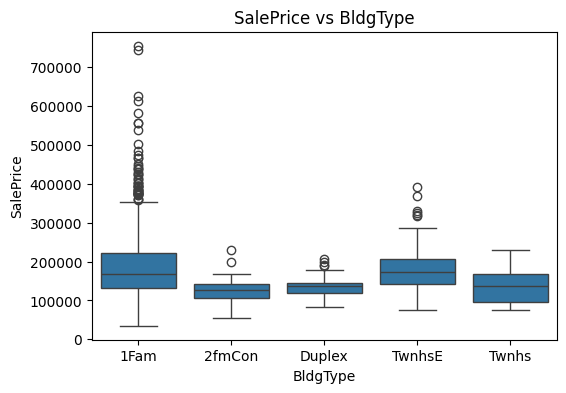

In [115]:
# create a figure
plt.figure(figsize=(6,4))
# draw the box plot
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = data)
# add title and labels
plt.title('SalePrice vs BldgType')
plt.xlabel('BldgType')
plt.ylabel('SalePrice')
# display the plot
plt.show()

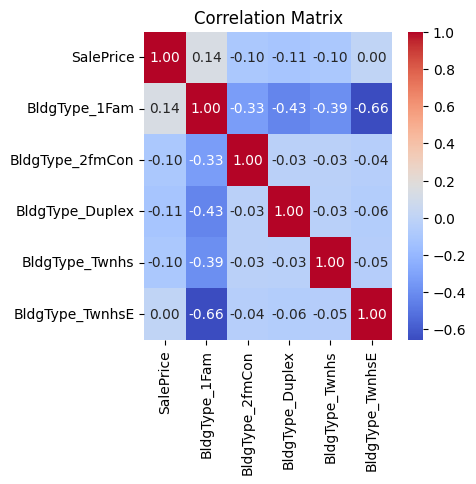

In [116]:
# check the multicollinearity
data_copy = data.copy()
data_copy = pd.get_dummies(data_copy[['BldgType','SalePrice']], drop_first = False)
corr = data_copy.corr()
# create a figure
plt.figure(figsize=(4, 4))
# draw the heatmap
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = 'coolwarm')
# add title
plt.title('Correlation Matrix')
# display the plot
plt.show()
# release the memory
del data_copy
del corr

# 17
HouseStyle

In [117]:
print(data['HouseStyle'].nunique(), '\n', data['HouseStyle'].value_counts())

8 
 HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64


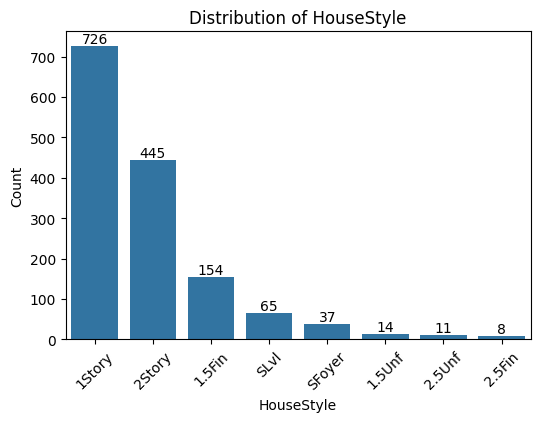

In [118]:
# create a figure
plt.figure(figsize=(6,4))
# calculate the count of each value
HouseStyle_counts = data['HouseStyle'].value_counts()
# draw the bar chart
sns.barplot(x = HouseStyle_counts.index, y = HouseStyle_counts.values)
# add title and labels
plt.title('Distribution of HouseStyle')
plt.xlabel('HouseStyle')
plt.ylabel('Count')
# add data labels on the top of the bars
for index, value in enumerate(HouseStyle_counts):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', color = 'black')
# rotate the x-axis labels
plt.xticks(rotation = 45)
# display the plot
plt.show()
# release the memory
del HouseStyle_counts

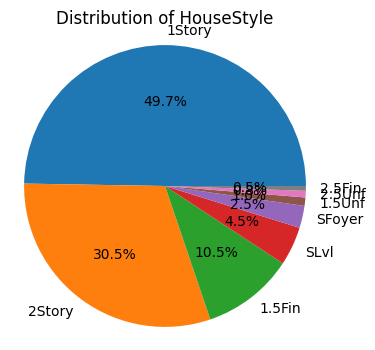

In [119]:
# create a figure
plt.figure(figsize=(4,4))
# calculate the percentage of each value
HouseStyle_counts = data['HouseStyle'].value_counts()
HouseStyle_percent = HouseStyle_counts / len(data)
# draw the pie plot
plt.pie(HouseStyle_percent, labels = HouseStyle_percent.index, autopct = "%1.1f%%", startangle = 0)
# add title
plt.title('Distribution of HouseStyle')
# display the plot
plt.axis('equal')
plt.show()
# release the memory
del HouseStyle_counts
del HouseStyle_percent

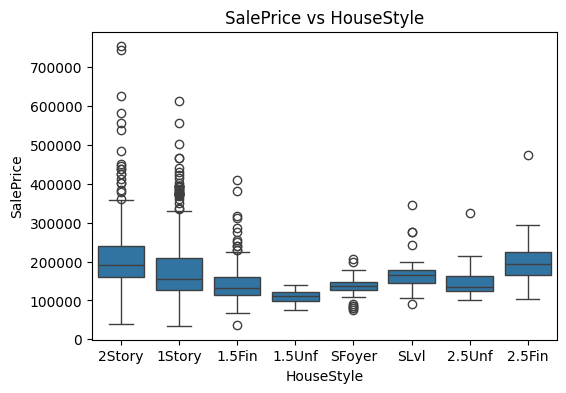

In [120]:
# create a figure
plt.figure(figsize=(6,4))
# draw the box plot
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = data)
# add title and labels
plt.title('SalePrice vs HouseStyle')
plt.xlabel('HouseStyle')
plt.ylabel('SalePrice')
# display the plot
plt.show()

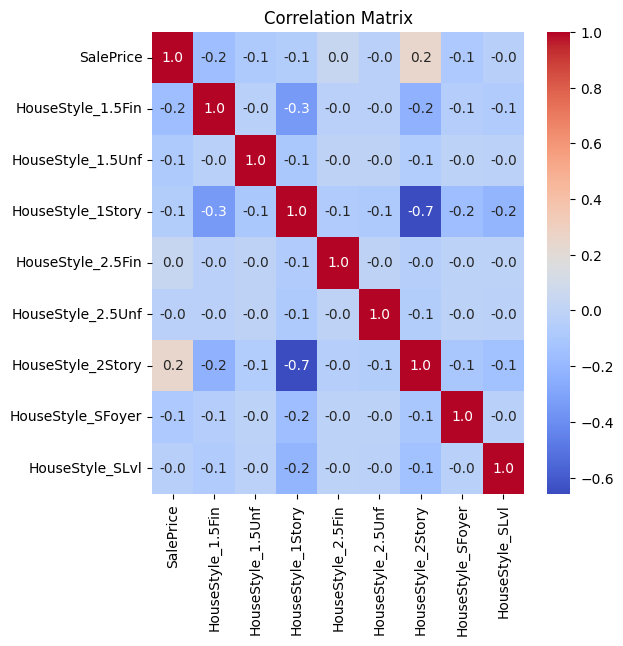

In [121]:
# check the multicollinearity
data_copy = data.copy()
data_copy = pd.get_dummies(data_copy[['HouseStyle','SalePrice']], drop_first = False)
corr = data_copy.corr()
# create a figure
plt.figure(figsize=(6, 6))
# draw the heatmap
sns.heatmap(corr, annot = True, fmt = ".1f", cmap = 'coolwarm')
# add title
plt.title('Correlation Matrix')
# display the plot
plt.show()
# release the memory
del data_copy
del corr

# 18
OverallQual

In [122]:
print(data['OverallQual'].nunique(), '\n', data['OverallQual'].value_counts())

10 
 OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64


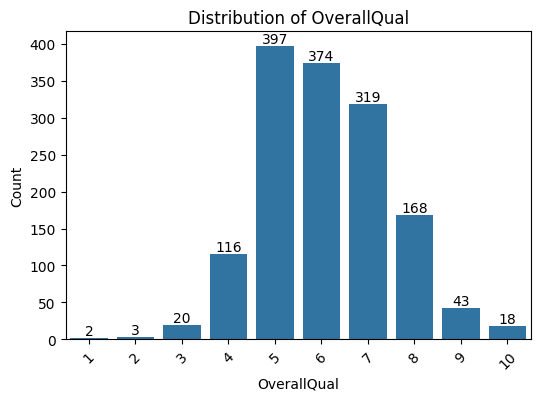

In [129]:
# create a figure
plt.figure(figsize=(6,4))
# calculate the count of each value
OverallQual_counts = data['OverallQual'].value_counts().sort_index(ascending=True)
# draw the bar chart
sns.barplot(x = OverallQual_counts.index, y = OverallQual_counts.values)
# add title and labels
plt.title('Distribution of OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('Count')
# add data labels on the top of the bars
for index, value in enumerate(OverallQual_counts):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', color = 'black')
# rotate the x-axis labels
plt.xticks(rotation = 45)
# display the plot
plt.show()
# release the memory
del OverallQual_counts

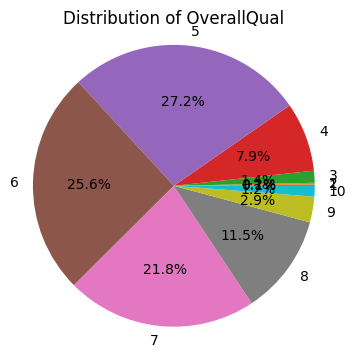

In [130]:
# create a figure
plt.figure(figsize=(4,4))
# calculate the percentage of each value
OverallQual_counts = data['OverallQual'].value_counts().sort_index(ascending=True)
OverallQual_percent = OverallQual_counts / len(data)
# draw the pie plot
plt.pie(OverallQual_percent, labels = OverallQual_percent.index, autopct = "%1.1f%%", startangle = 0)
# add title
plt.title('Distribution of OverallQual')
# display the plot
plt.axis('equal')
plt.show()
# release the memory
del OverallQual_counts
del OverallQual_percent

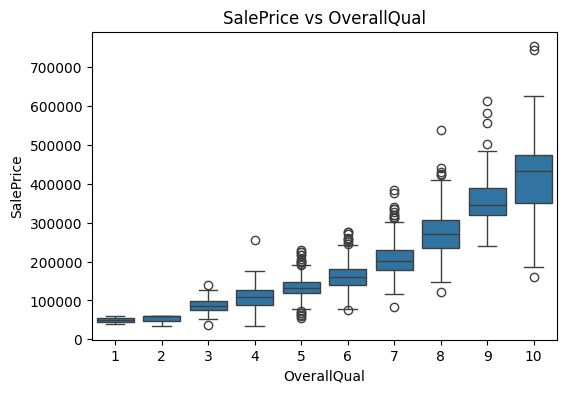

In [131]:
# create a figure
plt.figure(figsize=(6,4))
# draw the box plot
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = data)
# add title and labels
plt.title('SalePrice vs OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
# display the plot
plt.show()

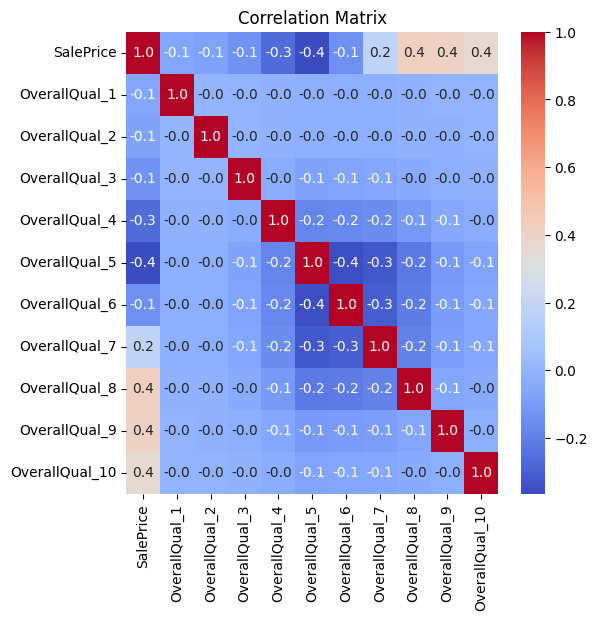

In [132]:
# check the multicollinearity
data_copy = data.copy()
data_copy['OverallQual'] = data_copy['OverallQual'].astype('category')
data_copy = pd.get_dummies(data_copy[['OverallQual','SalePrice']], drop_first = False)
corr = data_copy.corr()
# create a figure
plt.figure(figsize=(6, 6))
# draw the heatmap
sns.heatmap(corr, annot = True, fmt = ".1f", cmap = 'coolwarm')
# add title
plt.title('Correlation Matrix')
# display the plot
plt.show()
# release the memory
del data_copy
del corr

In [142]:
# check the correlation
corr = data[['OverallQual', 'SalePrice']].corr().iloc[0, 1]
# print the correlation
print(corr)
# release the memory
del corr

0.7909816005838053


# 19
OverallCond

In [133]:
print(data['OverallCond'].nunique(), '\n', data['OverallCond'].value_counts())

9 
 OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64


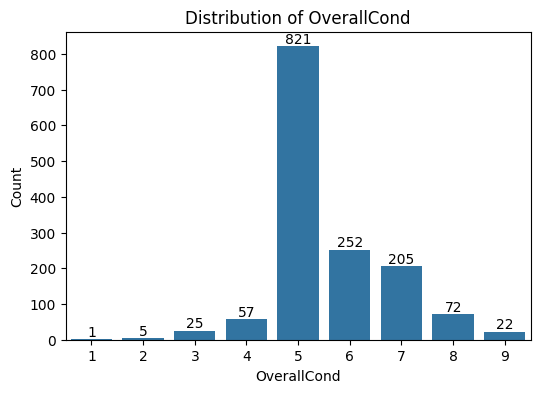

In [134]:
# create a figure
plt.figure(figsize=(6,4))
# calculate the count of each value
OverallCond_counts = data['OverallCond'].value_counts().sort_index(ascending=True)
# draw the bar chart
sns.barplot(x = OverallCond_counts.index, y = OverallCond_counts.values)
# add title and labels
plt.title('Distribution of OverallCond')
plt.xlabel('OverallCond')
plt.ylabel('Count')
# add data labels on the top of the bars
for index, value in enumerate(OverallCond_counts):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', color = 'black')
# display the plot
plt.show()
# release the memory
del OverallCond_counts

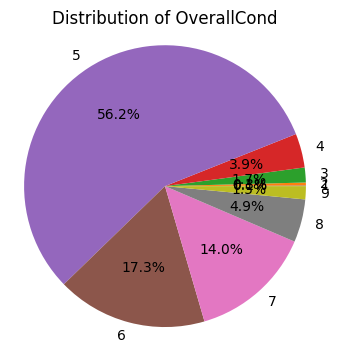

In [135]:
# create a figure
plt.figure(figsize=(4,4))
# calculate the percentage of each value
OverallCond_counts = data['OverallCond'].value_counts().sort_index(ascending=True)
OverallCond_percent = OverallCond_counts / len(data)
# draw the pie plot
plt.pie(OverallCond_percent, labels = OverallCond_percent.index, autopct = "%1.1f%%", startangle = 0)
# add title
plt.title('Distribution of OverallCond')
# display the plot
plt.axis('equal')
plt.show()
# release the memory
del OverallCond_counts
del OverallCond_percent

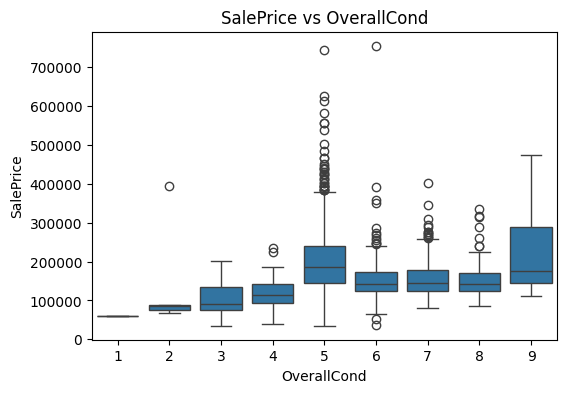

In [136]:
# create a figure
plt.figure(figsize=(6,4))
# draw the box plot
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = data)
# add title and labels
plt.title('SalePrice vs OverallCond')
plt.xlabel('OverallCond')
plt.ylabel('SalePrice')
# display the plot
plt.show()

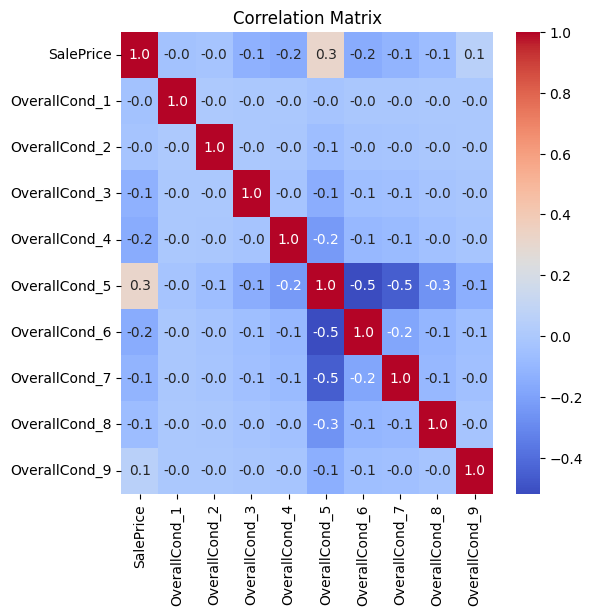

In [137]:
# check the multicollinearity
data_copy = data.copy()
data_copy['OverallCond'] = data_copy['OverallCond'].astype('category')
data_copy = pd.get_dummies(data_copy[['OverallCond','SalePrice']], drop_first = False)
corr = data_copy.corr()
# create a figure
plt.figure(figsize=(6, 6))
# draw the heatmap
sns.heatmap(corr, annot = True, fmt = ".1f", cmap = 'coolwarm')
# add title
plt.title('Correlation Matrix')
# display the plot
plt.show()
# release the memory
del data_copy
del corr

In [143]:
# check the correlation
corr = data[['OverallCond', 'SalePrice']].corr().iloc[0, 1]
# print the correlation
print(corr)
# release the memory
del corr

-0.07785589404867797


# 20
YearBuilt

In [138]:
print(data['YearBuilt'].nunique(), '\n', data['YearBuilt'].value_counts())

112 
 YearBuilt
2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: count, Length: 112, dtype: int64


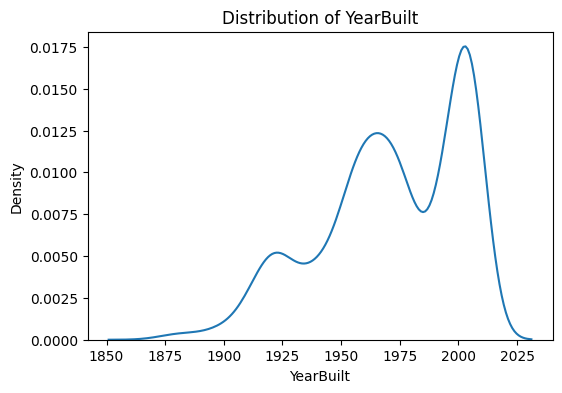

In [139]:
# create a figure
plt.figure(figsize=(6,4))
# draw the kde plot
sns.kdeplot(data = data, x = 'YearBuilt')
# add title
plt.title('Distribution of YearBuilt')
# display the plot
plt.show()

In [141]:
# check the correlation
corr = data[['YearBuilt', 'SalePrice']].corr().iloc[0, 1]
# print the correlation
print(corr)
# release the memory
del corr

0.5228973328794967


# 21
YearRemodAdd

In [144]:
print(data['YearRemodAdd'].nunique(), '\n', data['YearRemodAdd'].value_counts())

61 
 YearRemodAdd
1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1983      5
1952      5
1986      5
1951      4
Name: count, Length: 61, dtype: int64


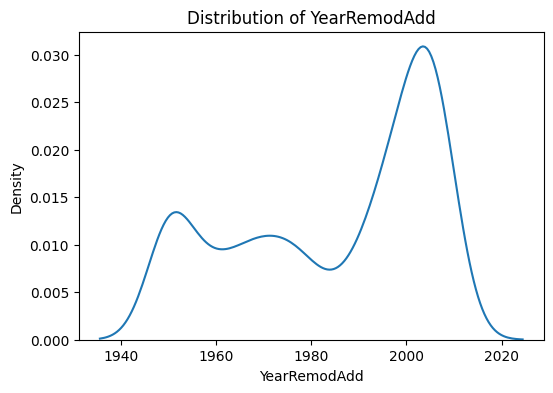

In [145]:
# create a figure
plt.figure(figsize=(6,4))
# draw the kde plot
sns.kdeplot(data = data, x = 'YearRemodAdd')
# add title
plt.title('Distribution of YearRemodAdd')
# display the plot
plt.show()

# 22
RoofStyle

In [146]:
print(data['RoofStyle'].nunique(), '\n', data['RoofStyle'].value_counts())

6 
 RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64


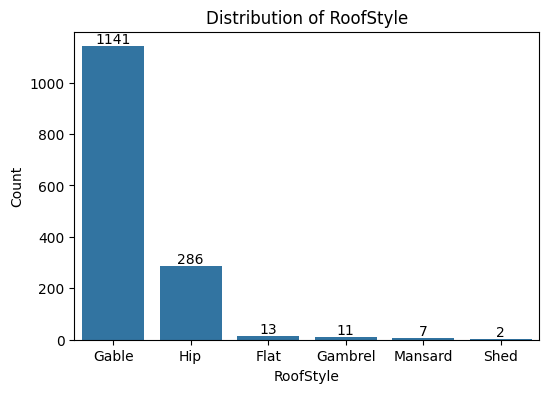

In [147]:
# create a figure
plt.figure(figsize=(6,4))
# calculate the count of each value
RoofStyle_counts = data['RoofStyle'].value_counts()
# draw the bar chart
sns.barplot(x = RoofStyle_counts.index, y = RoofStyle_counts.values)
# add title and labels
plt.title('Distribution of RoofStyle')
plt.xlabel('RoofStyle')
plt.ylabel('Count')
# add data labels on the top of the bars
for index, value in enumerate(RoofStyle_counts):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', color = 'black')
# display the plot
plt.show()
# release the memory
del RoofStyle_counts

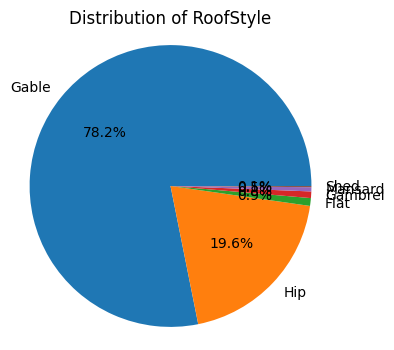

In [148]:
# create a figure
plt.figure(figsize=(4,4))
# calculate the percentage of each value
RoofStyle_counts = data['RoofStyle'].value_counts()
RoofStyle_percent = RoofStyle_counts / len(data)
# draw the pie plot
plt.pie(RoofStyle_percent, labels = RoofStyle_percent.index, autopct = "%1.1f%%", startangle = 0)
# add title
plt.title('Distribution of RoofStyle')
# display the plot
plt.axis('equal')
plt.show()
# release the memory
del RoofStyle_counts
del RoofStyle_percent

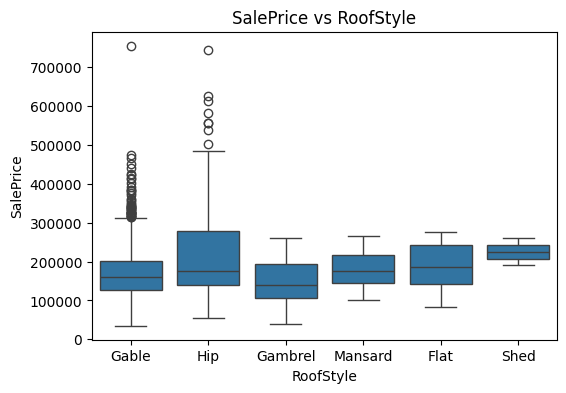

In [149]:
# create a figure
plt.figure(figsize=(6,4))
# draw the box plot
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = data)
# add title and labels
plt.title('SalePrice vs RoofStyle')
plt.xlabel('RoofStyle')
plt.ylabel('SalePrice')
# display the plot
plt.show()

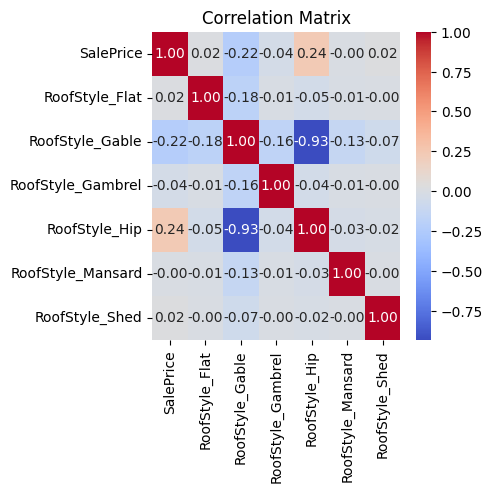

In [150]:
# check the multicollinearity
data_copy = data.copy()
data_copy = pd.get_dummies(data_copy[['RoofStyle','SalePrice']], drop_first = False)
corr = data_copy.corr()
# create a figure
plt.figure(figsize=(4, 4))
# draw the heatmap
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = 'coolwarm')
# add title
plt.title('Correlation Matrix')
# display the plot
plt.show()
# release the memory
del data_copy
del corr

# 23
RoofMatl

In [151]:
print(data['RoofMatl'].nunique(), '\n', data['RoofMatl'].value_counts())

8 
 RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64


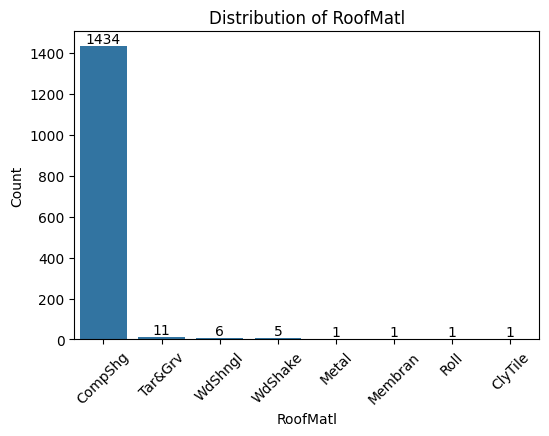

In [158]:
# create a figure
plt.figure(figsize=(6,4))
# calculate the count of each value
RoofMatl_counts = data['RoofMatl'].value_counts()
# draw the bar chart
sns.barplot(x = RoofMatl_counts.index, y = RoofMatl_counts.values)
# add title and labels
plt.title('Distribution of RoofMatl')
plt.xlabel('RoofMatl')
plt.ylabel('Count')
# add data labels on the top of the bars
for index, value in enumerate(RoofMatl_counts):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', color = 'black')
# rotate the x-axis labels
plt.xticks(rotation = 45)
# display the plot
plt.show()
# release the memory
del RoofMatl_counts

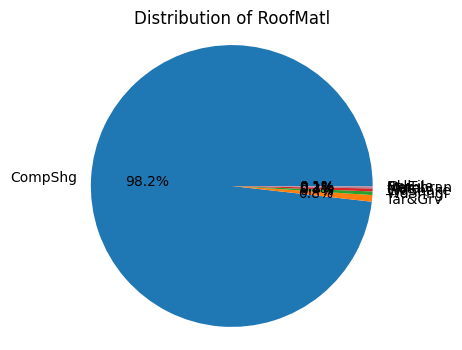

In [153]:
# create a figure
plt.figure(figsize=(4,4))
# calculate the percentage of each value
RoofMatl_counts = data['RoofMatl'].value_counts()
RoofMatl_percent = RoofMatl_counts / len(data)
# draw the pie plot
plt.pie(RoofMatl_percent, labels = RoofMatl_percent.index, autopct = "%1.1f%%", startangle = 0)
# add title
plt.title('Distribution of RoofMatl')
# display the plot
plt.axis('equal')
plt.show()
# release the memory
del RoofMatl_counts
del RoofMatl_percent

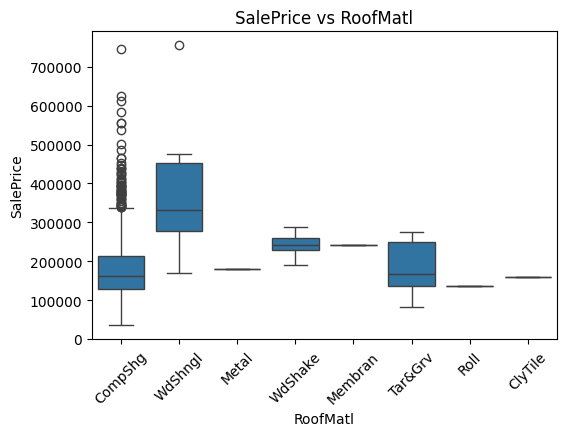

In [157]:
# create a figure
plt.figure(figsize=(6,4))
# draw the box plot
sns.boxplot(x = 'RoofMatl', y = 'SalePrice', data = data)
# add title and labels
plt.title('SalePrice vs RoofMatl')
plt.xlabel('RoofMatl')
plt.ylabel('SalePrice')
# rotate the x-axis labels
plt.xticks(rotation = 45)
# display the plot
plt.show()


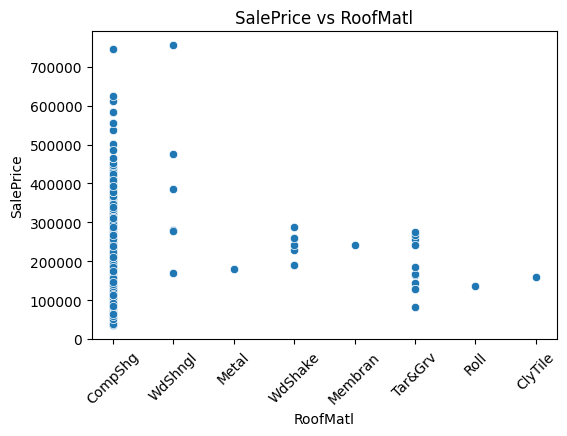

In [156]:
# create a figure
plt.figure(figsize=(6,4))
# draw the scatter plot
sns.scatterplot(data = data, x = 'RoofMatl', y = 'SalePrice')
# add title
plt.title('SalePrice vs RoofMatl')
# rotate the x-axis labels
plt.xticks(rotation = 45)
# display the plot
plt.show()

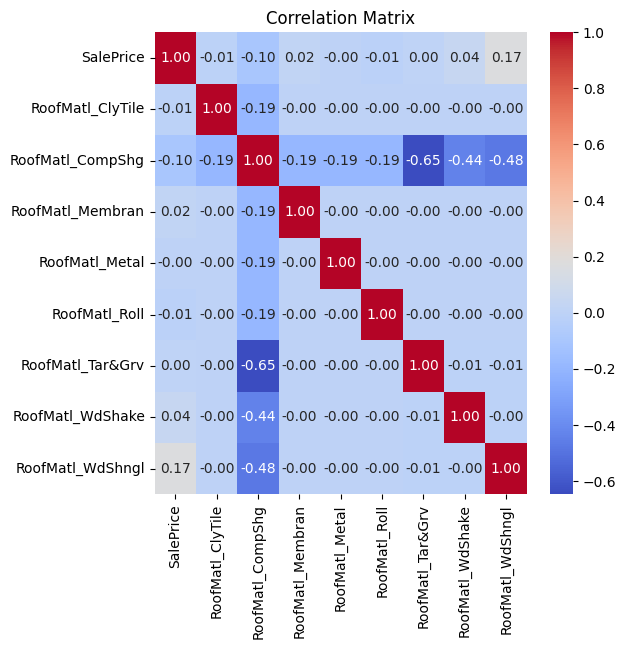

In [160]:
# check the multicollinearity
data_copy = data.copy()
data_copy = pd.get_dummies(data_copy[['RoofMatl','SalePrice']], drop_first = False)
corr = data_copy.corr()
# create a figure
plt.figure(figsize=(6, 6))
# draw the heatmap
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = 'coolwarm')
# add title
plt.title('Correlation Matrix')
# display the plot
plt.show()
# release the memory
del data_copy
del corr

# 24
Exterior1st

In [161]:
print(data['Exterior1st'].nunique(), '\n', data['Exterior1st'].value_counts())

15 
 Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64


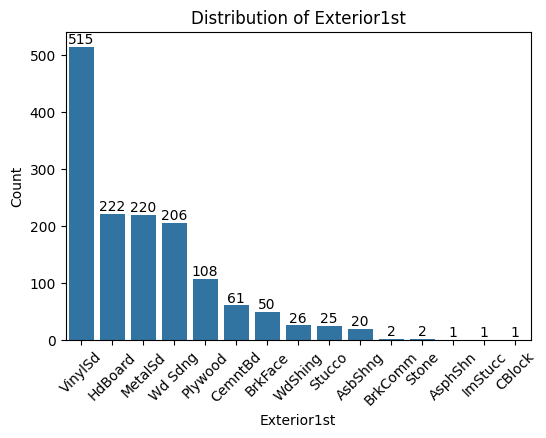

In [162]:
# create a figure
plt.figure(figsize=(6,4))
# calculate the count of each value
Exterior1st_counts = data['Exterior1st'].value_counts()
# draw the bar chart
sns.barplot(x = Exterior1st_counts.index, y = Exterior1st_counts.values)
# add title and labels
plt.title('Distribution of Exterior1st')
plt.xlabel('Exterior1st')
plt.ylabel('Count')
# add data labels on the top of the bars
for index, value in enumerate(Exterior1st_counts):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', color = 'black')
# rotate the x-axis labels
plt.xticks(rotation = 45)
# display the plot
plt.show()
# release the memory
del Exterior1st_counts

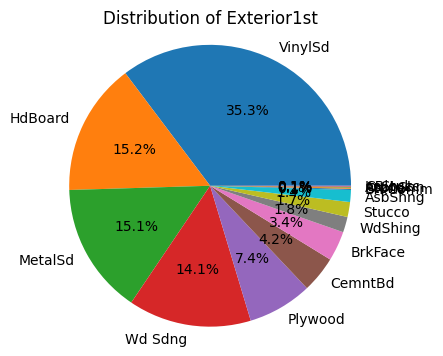

In [163]:
# create a figure
plt.figure(figsize=(4,4))
# calculate the percentage of each value
Exterior1st_counts = data['Exterior1st'].value_counts()
Exterior1st_percent = Exterior1st_counts / len(data)
# draw the pie plot
plt.pie(Exterior1st_percent, labels = Exterior1st_percent.index, autopct = "%.1f%%", startangle = 0)
# add title
plt.title('Distribution of Exterior1st')
# display the plot
plt.axis('equal')
plt.show()
# release the memory
del Exterior1st_counts
del Exterior1st_percent

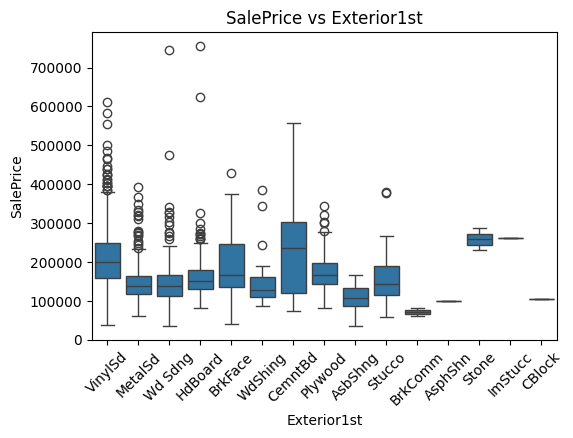

In [164]:
# create a figure
plt.figure(figsize=(6,4))
# draw the box plot
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = data)
# add title and labels
plt.title('SalePrice vs Exterior1st')
plt.xlabel('Exterior1st')
plt.ylabel('SalePrice')
# rotate the x-axis labels
plt.xticks(rotation = 45)
# display the plot
plt.show()

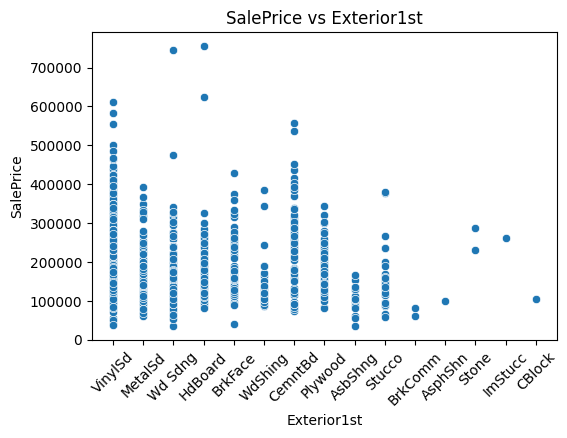

In [165]:
# create a figure
plt.figure(figsize=(6,4))
# draw the scatter plot
sns.scatterplot(data = data, x = 'Exterior1st', y = 'SalePrice')
# add title
plt.title('SalePrice vs Exterior1st')
# rotate the x-axis labels
plt.xticks(rotation = 45)
# display the plot
plt.show()

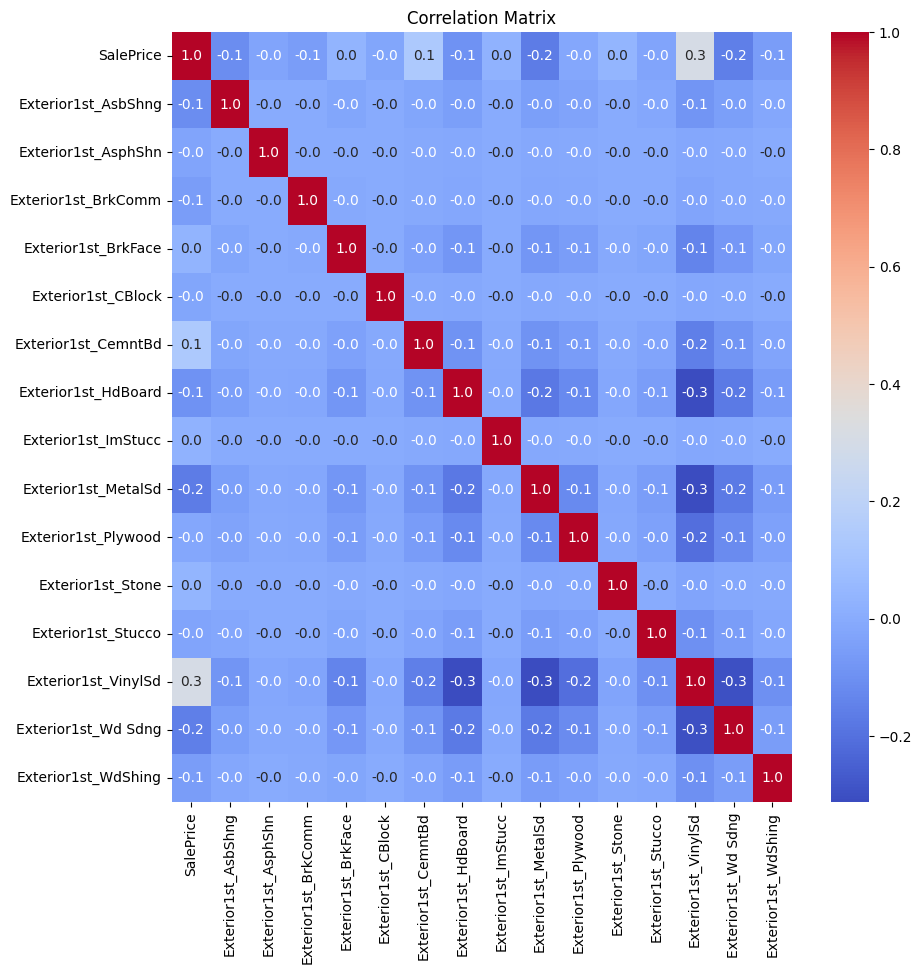

In [166]:
# check the multicollinearity
data_copy = data.copy()
data_copy = pd.get_dummies(data_copy[['Exterior1st','SalePrice']], drop_first = False)
corr = data_copy.corr()
# create a figure
plt.figure(figsize=(10, 10))
# draw the heatmap
sns.heatmap(corr, annot = True, fmt = ".1f", cmap = 'coolwarm')
# add title
plt.title('Correlation Matrix')
# display the plot
plt.show()
# release the memory
del data_copy
del corr

# 25
Exterior2nd

In [167]:
print(data['Exterior2nd'].nunique(), '\n', data['Exterior2nd'].value_counts())

16 
 Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64


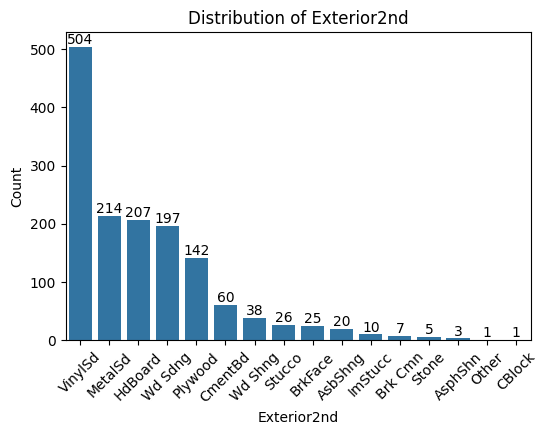

In [168]:
# create a figure
plt.figure(figsize=(6,4))
# calculate the count of each value
Exterior2nd_counts = data['Exterior2nd'].value_counts()
# draw the bar chart
sns.barplot(x = Exterior2nd_counts.index, y = Exterior2nd_counts.values)
# add title and labels
plt.title('Distribution of Exterior2nd')
plt.xlabel('Exterior2nd')
plt.ylabel('Count')
# add data labels on the top of the bars
for index, value in enumerate(Exterior2nd_counts):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', color = 'black')
# rotate the x-axis labels
plt.xticks(rotation = 45)
# display the plot
plt.show()
# release the memory
del Exterior2nd_counts

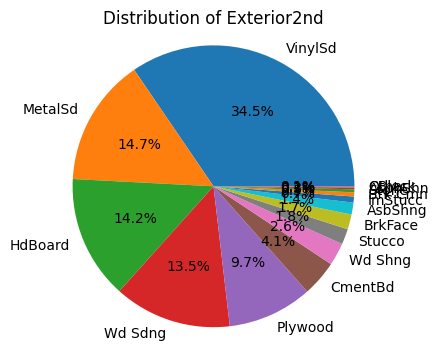

In [169]:
# create a figure
plt.figure(figsize=(4,4))
# calculate the percentage of each value
Exterior2nd_counts = data['Exterior2nd'].value_counts()
Exterior2nd_percent = Exterior2nd_counts / len(data)
# draw the pie plot
plt.pie(Exterior2nd_percent, labels = Exterior2nd_percent.index, autopct = "%.1f%%", startangle = 0)
# add title
plt.title('Distribution of Exterior2nd')
# display the plot
plt.axis('equal')
plt.show()
# release the memory
del Exterior2nd_counts
del Exterior2nd_percent

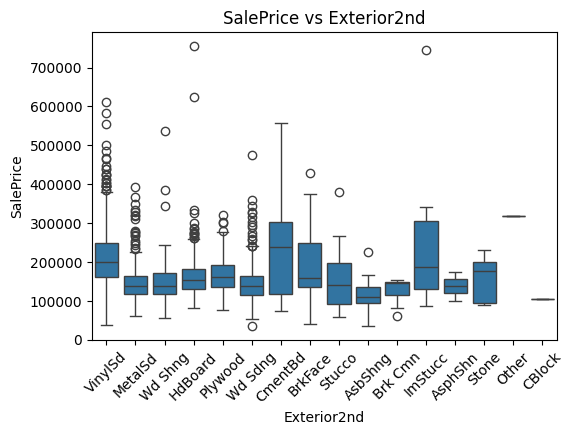

In [170]:
# create a figure
plt.figure(figsize=(6,4))
# draw the box plot
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = data)
# add title and labels
plt.title('SalePrice vs Exterior2nd')
plt.xlabel('Exterior2nd')
plt.ylabel('SalePrice')
# rotate the x-axis labels
plt.xticks(rotation = 45)
# display the plot
plt.show()

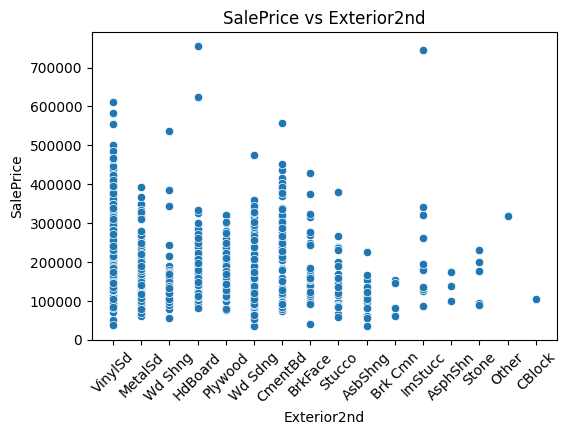

In [171]:
# create a figure
plt.figure(figsize=(6,4))
# draw the scatter plot
sns.scatterplot(data = data, x = 'Exterior2nd', y = 'SalePrice')
# add title
plt.title('SalePrice vs Exterior2nd')
# rotate the x-axis labels
plt.xticks(rotation = 45)
# display the plot
plt.show()

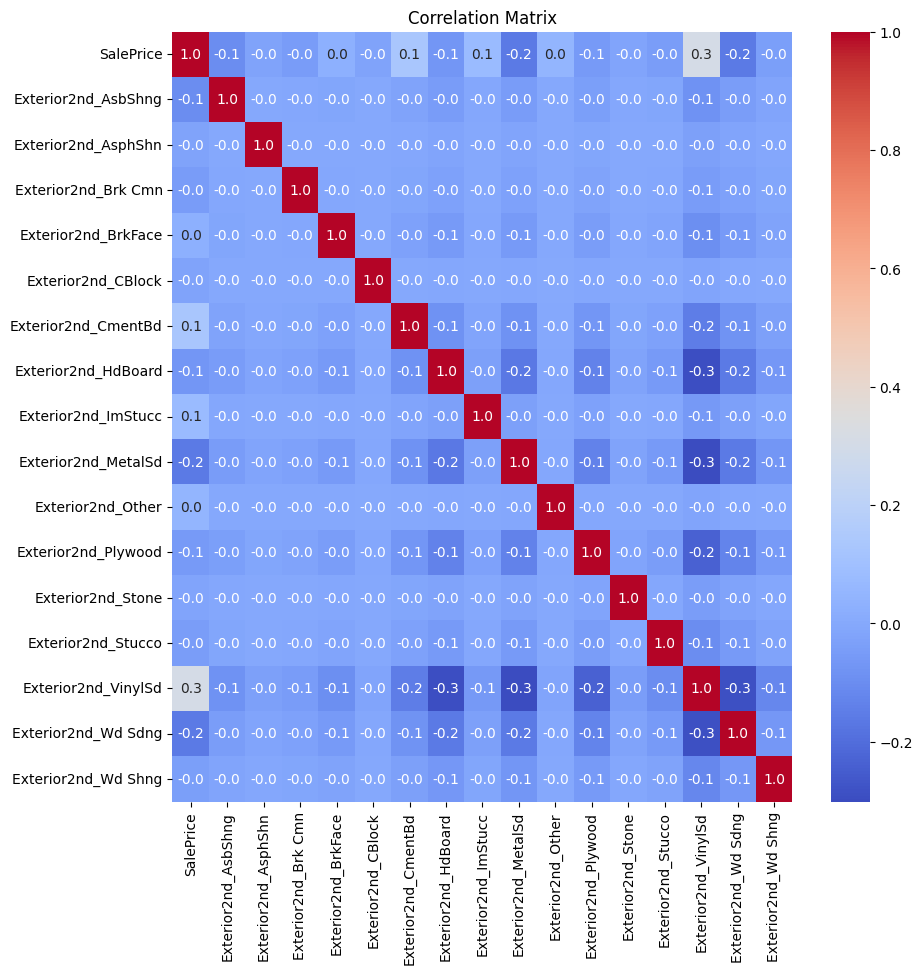

In [172]:
# check the multicollinearity
data_copy = data.copy()
data_copy = pd.get_dummies(data_copy[['Exterior2nd','SalePrice']], drop_first = False)
corr = data_copy.corr()
# create a figure
plt.figure(figsize=(10, 10))
# draw the heatmap
sns.heatmap(corr, annot = True, fmt = ".1f", cmap = 'coolwarm')
# add title
plt.title('Correlation Matrix')
# display the plot
plt.show()
# release the memory
del data_copy
del corr

In [177]:
# check the relationship between Exterior1st and Exterior2nd
data.groupby('Exterior1st')['Exterior2nd'].value_counts()

Exterior1st  Exterior2nd
AsbShng      AsbShng        17
             Plywood         2
             Stucco          1
AsphShn      AsphShn         1
BrkComm      Brk Cmn         2
                            ..
WdShing      Wd Shng        17
             Plywood         5
             HdBoard         2
             Stucco          1
             Wd Sdng         1
Name: count, Length: 67, dtype: int64

I guess these two attributes has a large correlation value.

# 26
MasVnrType

In [178]:
print(data['MasVnrType'].nunique(), '\n', data['MasVnrType'].value_counts())

3 
 MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64


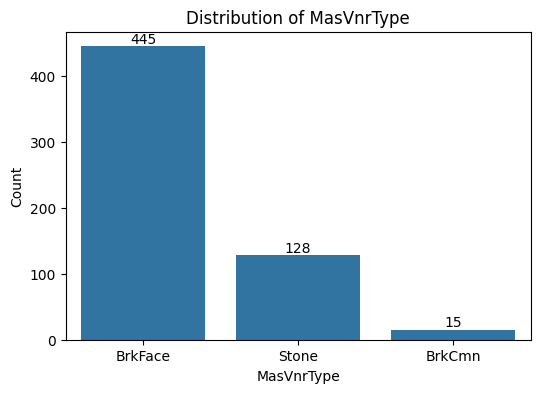

In [179]:
# create a figure
plt.figure(figsize=(6,4))
# calculate the count of each value
MasVnrType_counts = data['MasVnrType'].value_counts()
# draw the bar chart
sns.barplot(x = MasVnrType_counts.index, y = MasVnrType_counts.values)
# add title and labels
plt.title('Distribution of MasVnrType')
plt.xlabel('MasVnrType')
plt.ylabel('Count')
# add data labels on the top of the bars
for index, value in enumerate(MasVnrType_counts):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', color = 'black')
# display the plot
plt.show()
# release the memory
del MasVnrType_counts

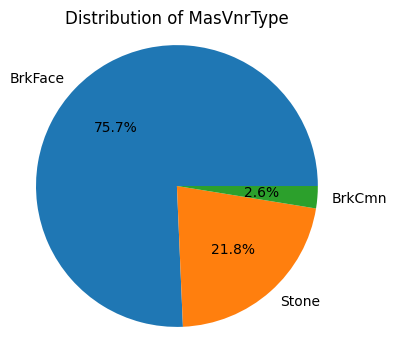

In [180]:
# create a figure
plt.figure(figsize=(4,4))
# calculate the percentage of each value
MasVnrType_counts = data['MasVnrType'].value_counts()
MasVnrType_percent = MasVnrType_counts / len(data)
# draw the pie plot
plt.pie(MasVnrType_percent, labels = MasVnrType_percent.index, autopct = "%.1f%%", startangle = 0)
# add title
plt.title('Distribution of MasVnrType')
# display the plot
plt.axis('equal')
plt.show()
# release the memory
del MasVnrType_counts
del MasVnrType_percent

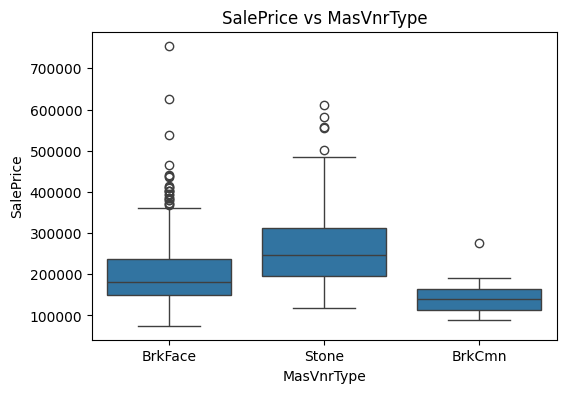

In [181]:
# create a figure
plt.figure(figsize=(6,4))
# draw the box plot
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = data)
# add title and labels
plt.title('SalePrice vs MasVnrType')
plt.xlabel('MasVnrType')
plt.ylabel('SalePrice')
# display the plot
plt.show()

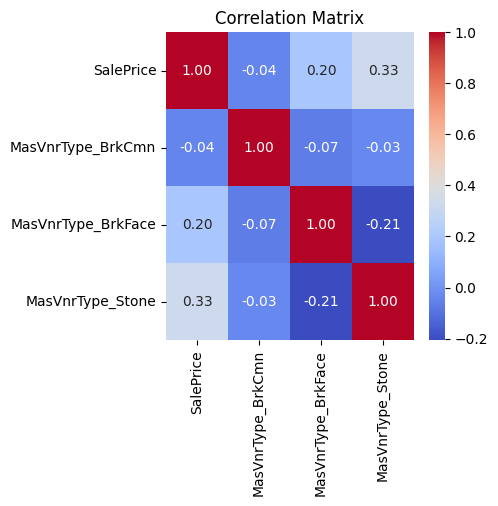

In [182]:
# check the multicollinearity
data_copy = data.copy()
data_copy = pd.get_dummies(data_copy[['MasVnrType','SalePrice']], drop_first = False)
corr = data_copy.corr()
# create a figure
plt.figure(figsize=(4, 4))
# draw the heatmap
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = 'coolwarm')
# add title
plt.title('Correlation Matrix')
# display the plot
plt.show()
# release the memory
del data_copy
del corr

# 27
MasVnrArea

In [183]:
print(data['MasVnrArea'].nunique(), '\n', data['MasVnrArea'].value_counts())

327 
 MasVnrArea
0.0      861
108.0      8
72.0       8
180.0      8
16.0       7
        ... 
426.0      1
96.0       1
438.0      1
194.0      1
119.0      1
Name: count, Length: 327, dtype: int64


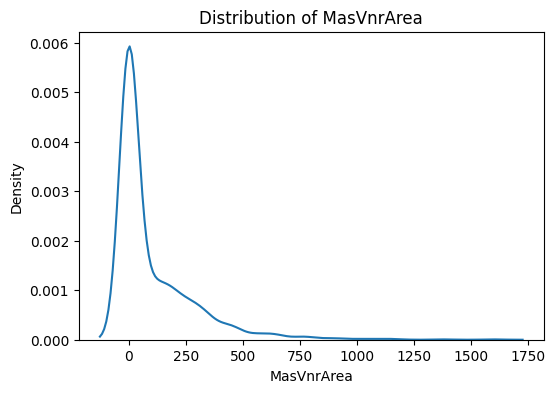

In [184]:
# create a figure
plt.figure(figsize=(6,4))
# draw the kde plot
sns.kdeplot(data = data, x = 'MasVnrArea')
# add title
plt.title('Distribution of MasVnrArea')
# display the plot
plt.show()

In [185]:
# check the correlation
corr = data[['MasVnrArea', 'SalePrice']].corr().iloc[0, 1]
# print the correlation
print(corr)
# release the memory
del corr

0.47749304709571444


# 28
ExterQual

In [186]:
print(data['ExterQual'].nunique(), '\n', data['ExterQual'].value_counts())

4 
 ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64


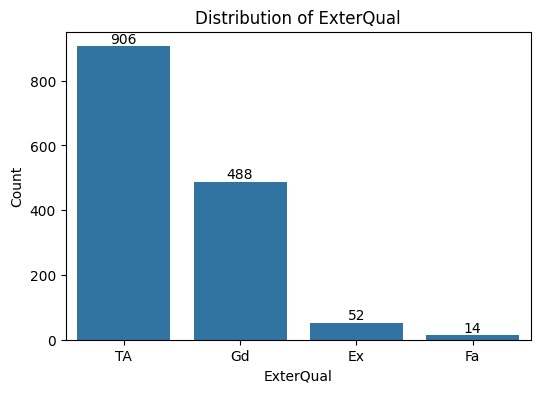

In [187]:
# create a figure
plt.figure(figsize=(6,4))
# calculate the count of each value
ExterQual_counts = data['ExterQual'].value_counts()
# draw the bar chart
sns.barplot(x = ExterQual_counts.index, y = ExterQual_counts.values)
# add title and labels
plt.title('Distribution of ExterQual')
plt.xlabel('ExterQual')
plt.ylabel('Count')
# add data labels on the top of the bars
for index, value in enumerate(ExterQual_counts):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', color = 'black')
# display the plot
plt.show()
# release the memory
del ExterQual_counts

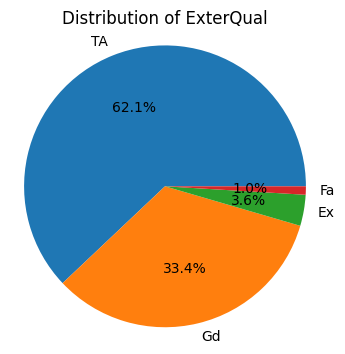

In [188]:
# create a figure
plt.figure(figsize=(4,4))
# calculate the percentage of each value
ExterQual_counts = data['ExterQual'].value_counts()
ExterQual_percent = ExterQual_counts / len(data)
# draw the pie plot
plt.pie(ExterQual_percent, labels = ExterQual_percent.index, autopct = "%.1f%%", startangle = 0)
# add title
plt.title('Distribution of ExterQual')
# display the plot
plt.axis('equal')
plt.show()
# release the memory
del ExterQual_counts
del ExterQual_percent

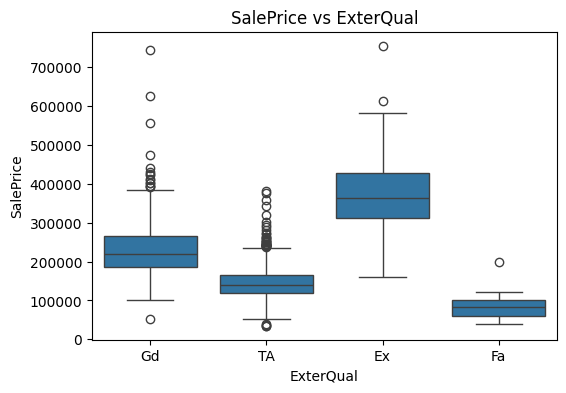

In [189]:
# create a figure
plt.figure(figsize=(6,4))
# draw the box plot
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = data)
# add title and labels
plt.title('SalePrice vs ExterQual')
plt.xlabel('ExterQual')
plt.ylabel('SalePrice')
# display the plot
plt.show()

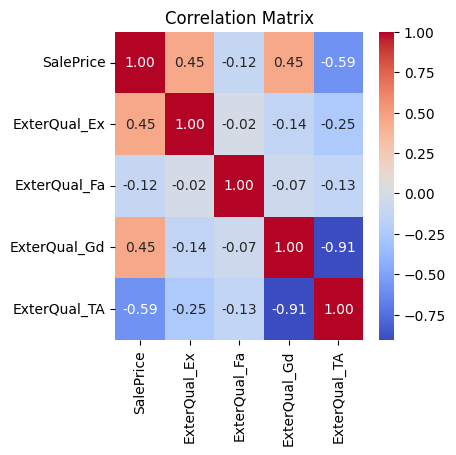

In [190]:
# check the multicollinearity
data_copy = data.copy()
data_copy = pd.get_dummies(data_copy[['ExterQual','SalePrice']], drop_first = False)
corr = data_copy.corr()
# create a figure
plt.figure(figsize=(4, 4))
# draw the heatmap
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = 'coolwarm')
# add title
plt.title('Correlation Matrix')
# display the plot
plt.show()
# release the memory
del data_copy
del corr

# 29
ExterCond

In [191]:
print(data['ExterCond'].nunique(), '\n', data['ExterCond'].value_counts())

5 
 ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64


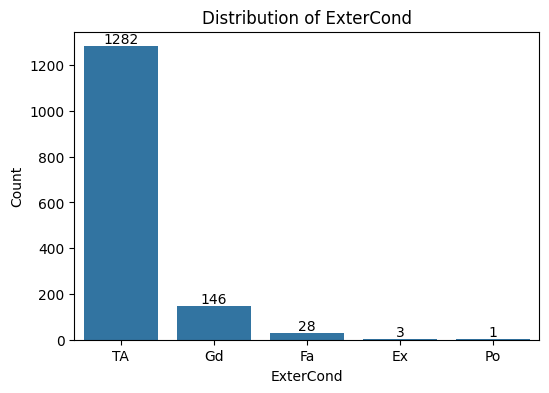

In [192]:
# create a figure
plt.figure(figsize=(6,4))
# calculate the count of each value
ExterCond_counts = data['ExterCond'].value_counts()
# draw the bar chart
sns.barplot(x = ExterCond_counts.index, y = ExterCond_counts.values)
# add title and labels
plt.title('Distribution of ExterCond')
plt.xlabel('ExterCond')
plt.ylabel('Count')
# add data labels on the top of the bars
for index, value in enumerate(ExterCond_counts):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', color = 'black')
# display the plot
plt.show()
# release the memory
del ExterCond_counts

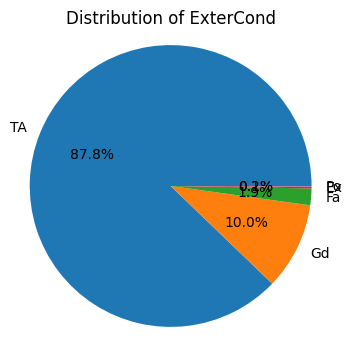

In [193]:
# create a figure
plt.figure(figsize=(4,4))
# calculate the percentage of each value
ExterCond_counts = data['ExterCond'].value_counts()
ExterCond_percent = ExterCond_counts / len(data)
# draw the pie plot
plt.pie(ExterCond_percent, labels = ExterCond_percent.index, autopct = "%.1f%%", startangle = 0)
# add title
plt.title('Distribution of ExterCond')
# display the plot
plt.axis('equal')
plt.show()
# release the memory
del ExterCond_counts
del ExterCond_percent

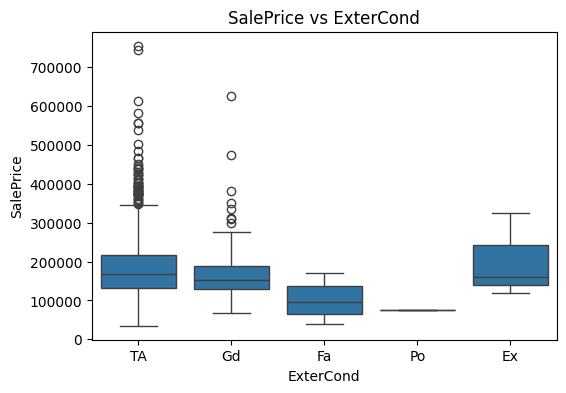

In [194]:
# create a figure
plt.figure(figsize=(6,4))
# draw the box plot
sns.boxplot(x = 'ExterCond', y = 'SalePrice', data = data)
# add title and labels
plt.title('SalePrice vs ExterCond')
plt.xlabel('ExterCond')
plt.ylabel('SalePrice')
# display the plot
plt.show()

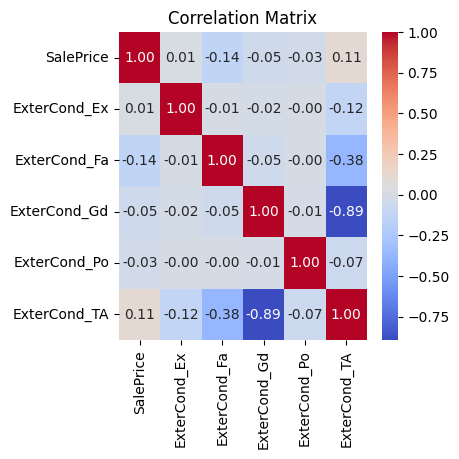

In [195]:
# check the multicollinearity
data_copy = data.copy()
data_copy = pd.get_dummies(data_copy[['ExterCond','SalePrice']], drop_first = False)
corr = data_copy.corr()
# create a figure
plt.figure(figsize=(4, 4))
# draw the heatmap
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = 'coolwarm')
# add title
plt.title('Correlation Matrix')
# display the plot
plt.show()
# release the memory
del data_copy
del corr

# 30
Foundation

In [196]:
print(data['Foundation'].nunique(), '\n', data['Foundation'].value_counts())

6 
 Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64


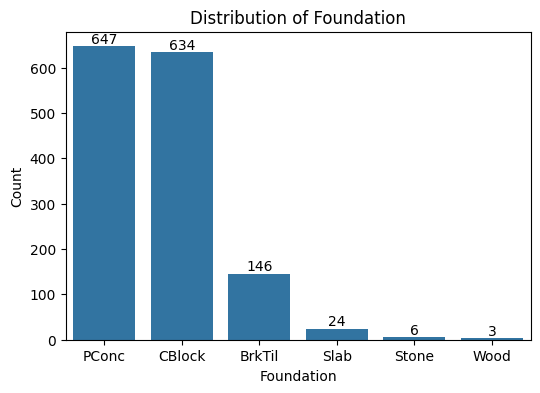

In [197]:
# create a figure
plt.figure(figsize=(6,4))
# calculate the count of each value
Foundation_counts = data['Foundation'].value_counts()
# draw the bar chart
sns.barplot(x = Foundation_counts.index, y = Foundation_counts.values)
# add title and labels
plt.title('Distribution of Foundation')
plt.xlabel('Foundation')
plt.ylabel('Count')
# add data labels on the top of the bars
for index, value in enumerate(Foundation_counts):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', color = 'black')
# display the plot
plt.show()
# release the memory
del Foundation_counts

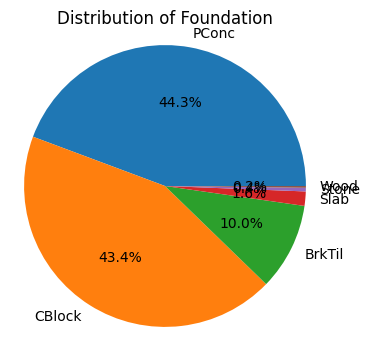

In [198]:
# create a figure
plt.figure(figsize=(4,4))
# calculate the percentage of each value
Foundation_counts = data['Foundation'].value_counts()
Foundation_percent = Foundation_counts / len(data)
# draw the pie plot
plt.pie(Foundation_percent, labels = Foundation_percent.index, autopct = "%.1f%%", startangle = 0)
# add title
plt.title('Distribution of Foundation')
# display the plot
plt.axis('equal')
plt.show()
# release the memory
del Foundation_counts
del Foundation_percent

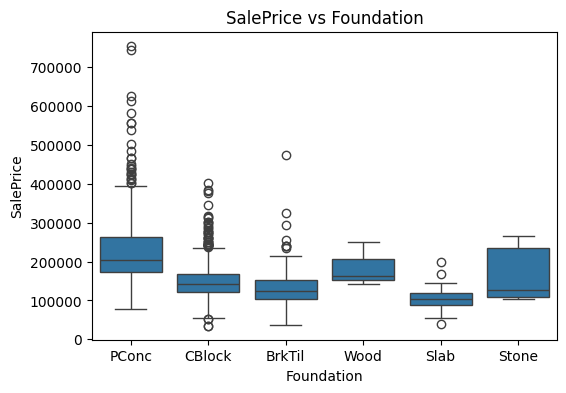

In [199]:
# create a figure
plt.figure(figsize=(6,4))
# draw the box plot
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = data)
# add title and labels
plt.title('SalePrice vs Foundation')
plt.xlabel('Foundation')
plt.ylabel('SalePrice')
# display the plot
plt.show()

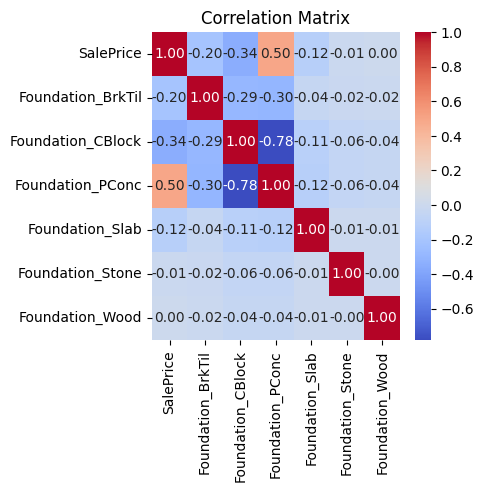

In [200]:
# check the multicollinearity
data_copy = data.copy()
data_copy = pd.get_dummies(data_copy[['Foundation','SalePrice']], drop_first = False)
corr = data_copy.corr()
# create a figure
plt.figure(figsize=(4, 4))
# draw the heatmap
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = 'coolwarm')
# add title
plt.title('Correlation Matrix')
# display the plot
plt.show()
# release the memory
del data_copy
del corr

# 31
BsmtQual

In [201]:
print(data['BsmtQual'].nunique(), '\n', data['BsmtQual'].value_counts())

4 
 BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64


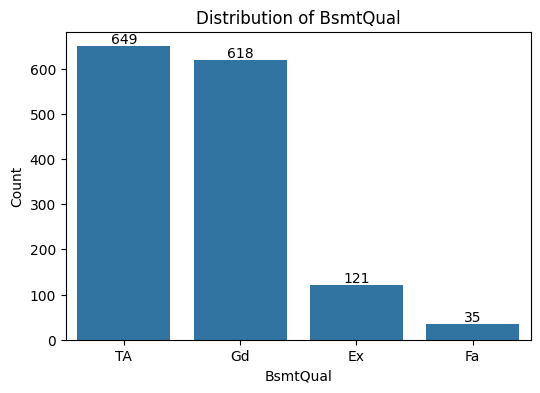

In [202]:
# create a figure
plt.figure(figsize=(6,4))
# calculate the count of each value
BsmtQual_counts = data['BsmtQual'].value_counts()
# draw the bar chart
sns.barplot(x = BsmtQual_counts.index, y = BsmtQual_counts.values)
# add title and labels
plt.title('Distribution of BsmtQual')
plt.xlabel('BsmtQual')
plt.ylabel('Count')
# add data labels on the top of the bars
for index, value in enumerate(BsmtQual_counts):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', color = 'black')
# display the plot
plt.show()
# release the memory
del BsmtQual_counts

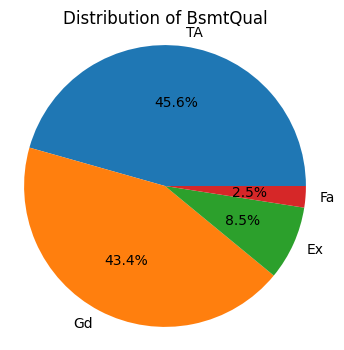

In [203]:
# create a figure
plt.figure(figsize=(4,4))
# calculate the percentage of each value
BsmtQual_counts = data['BsmtQual'].value_counts()
BsmtQual_percent = BsmtQual_counts / len(data)
# draw the pie plot
plt.pie(BsmtQual_percent, labels = BsmtQual_percent.index, autopct = "%.1f%%", startangle = 0)
# add title
plt.title('Distribution of BsmtQual')
# display the plot
plt.axis('equal')
plt.show()
# release the memory
del BsmtQual_counts
del BsmtQual_percent

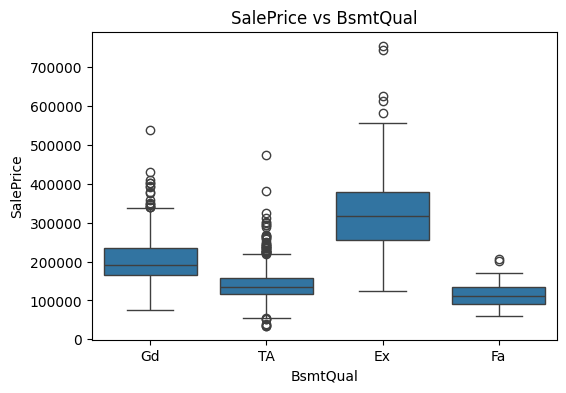

In [204]:
# create a figure
plt.figure(figsize=(6,4))
# draw the box plot
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = data)
# add title and labels
plt.title('SalePrice vs BsmtQual')
plt.xlabel('BsmtQual')
plt.ylabel('SalePrice')
# display the plot
plt.show()

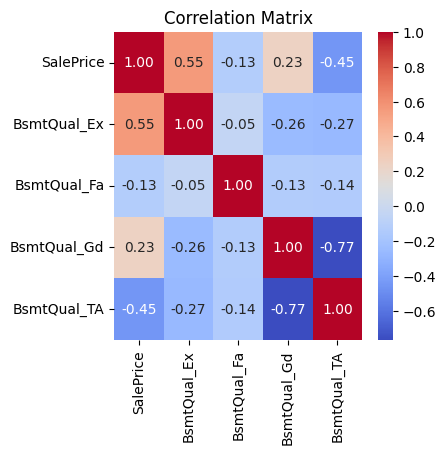

In [205]:
# check the multicollinearity
data_copy = data.copy()
data_copy = pd.get_dummies(data_copy[['BsmtQual','SalePrice']], drop_first = False)
corr = data_copy.corr()
# create a figure
plt.figure(figsize=(4, 4))
# draw the heatmap
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = 'coolwarm')
# add title
plt.title('Correlation Matrix')
# display the plot
plt.show()
# release the memory
del data_copy
del corr

# 32
BsmtCond

In [206]:
print(data['BsmtCond'].nunique(), '\n', data['BsmtCond'].value_counts())

4 
 BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64


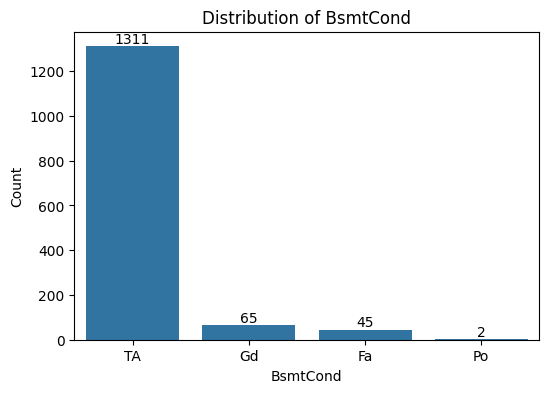

In [207]:
# create a figure
plt.figure(figsize=(6,4))
# calculate the count of each value
BsmtCond_counts = data['BsmtCond'].value_counts()
# draw the bar chart
sns.barplot(x = BsmtCond_counts.index, y = BsmtCond_counts.values)
# add title and labels
plt.title('Distribution of BsmtCond')
plt.xlabel('BsmtCond')
plt.ylabel('Count')
# add data labels on the top of the bars
for index, value in enumerate(BsmtCond_counts):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', color = 'black')
# display the plot
plt.show()
# release the memory
del BsmtCond_counts

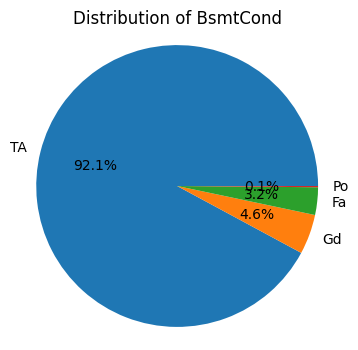

In [208]:
# create a figure
plt.figure(figsize=(4,4))
# calculate the percentage of each value
BsmtCond_counts = data['BsmtCond'].value_counts()
BsmtCond_percent = BsmtCond_counts / len(data)
# draw the pie plot
plt.pie(BsmtCond_percent, labels = BsmtCond_percent.index, autopct = "%.1f%%", startangle = 0)
# add title
plt.title('Distribution of BsmtCond')
# display the plot
plt.axis('equal')
plt.show()
# release the memory
del BsmtCond_counts
del BsmtCond_percent

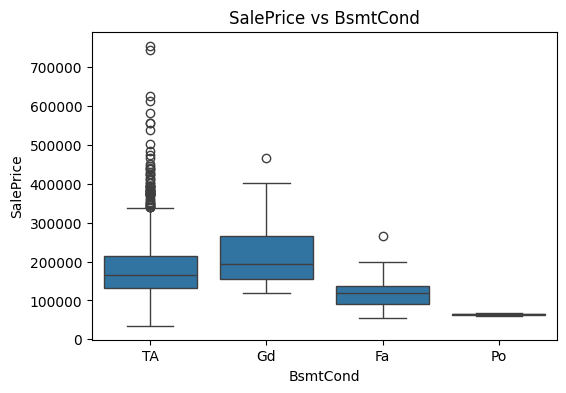

In [209]:
# create a figure
plt.figure(figsize=(6,4))
# draw the box plot
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = data)
# add title and labels
plt.title('SalePrice vs BsmtCond')
plt.xlabel('BsmtCond')
plt.ylabel('SalePrice')
# display the plot
plt.show()

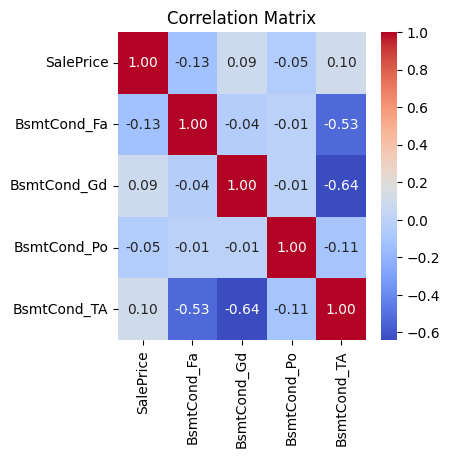

In [210]:
# check the multicollinearity
data_copy = data.copy()
data_copy = pd.get_dummies(data_copy[['BsmtCond','SalePrice']], drop_first = False)
corr = data_copy.corr()
# create a figure
plt.figure(figsize=(4, 4))
# draw the heatmap
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = 'coolwarm')
# add title
plt.title('Correlation Matrix')
# display the plot
plt.show()
# release the memory
del data_copy
del corr

# 33
BsmtExposure

In [211]:
print(data['BsmtExposure'].nunique(), '\n', data['BsmtExposure'].value_counts())

4 
 BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64


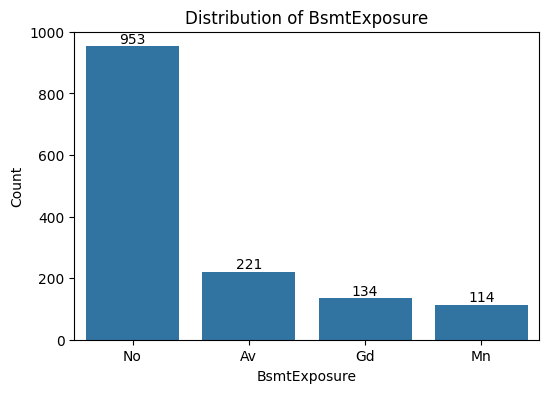

In [212]:
# create a figure
plt.figure(figsize=(6,4))
# calculate the count of each value
BsmtExposure_counts = data['BsmtExposure'].value_counts()
# draw the bar chart
sns.barplot(x = BsmtExposure_counts.index, y = BsmtExposure_counts.values)
# add title and labels
plt.title('Distribution of BsmtExposure')
plt.xlabel('BsmtExposure')
plt.ylabel('Count')
# add data labels on the top of the bars
for index, value in enumerate(BsmtExposure_counts):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', color = 'black')
# display the plot
plt.show()
# release the memory
del BsmtExposure_counts

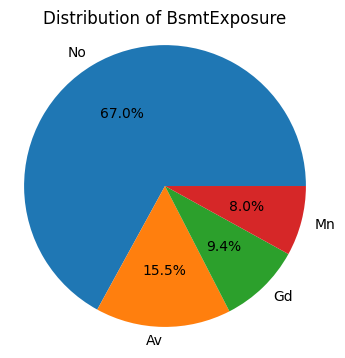

In [213]:
# create a figure
plt.figure(figsize=(4,4))
# calculate the percentage of each value
BsmtExposure_counts = data['BsmtExposure'].value_counts()
BsmtExposure_percent = BsmtExposure_counts / len(data)
# draw the pie plot
plt.pie(BsmtExposure_percent, labels = BsmtExposure_percent.index, autopct = "%.1f%%", startangle = 0)
# add title
plt.title('Distribution of BsmtExposure')
# display the plot
plt.axis('equal')
plt.show()
# release the memory
del BsmtExposure_counts
del BsmtExposure_percent

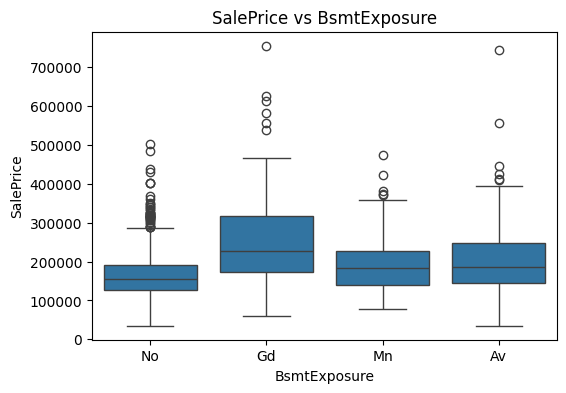

In [214]:
# create a figure
plt.figure(figsize=(6,4))
# draw the box plot
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = data)
# add title and labels
plt.title('SalePrice vs BsmtExposure')
plt.xlabel('BsmtExposure')
plt.ylabel('SalePrice')
# display the plot
plt.show()

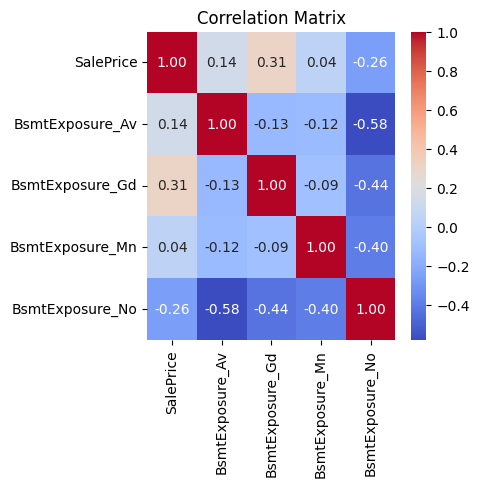

In [215]:
# check the multicollinearity
data_copy = data.copy()
data_copy = pd.get_dummies(data_copy[['BsmtExposure','SalePrice']], drop_first = False)
corr = data_copy.corr()
# create a figure
plt.figure(figsize=(4, 4))
# draw the heatmap
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = 'coolwarm')
# add title
plt.title('Correlation Matrix')
# display the plot
plt.show()
# release the memory
del data_copy
del corr

# 34
BsmtFinType1

In [216]:
print(data['BsmtFinType1'].nunique(), '\n', data['BsmtFinType1'].value_counts())

6 
 BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64


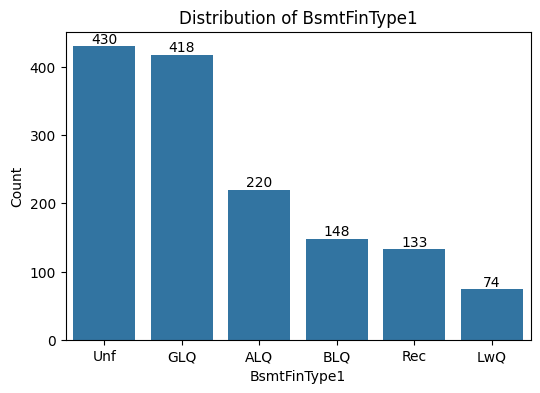

In [217]:
# create a figure
plt.figure(figsize=(6,4))
# calculate the count of each value
BsmtFinType1_counts = data['BsmtFinType1'].value_counts()
# draw the bar chart
sns.barplot(x = BsmtFinType1_counts.index, y = BsmtFinType1_counts.values)
# add title and labels
plt.title('Distribution of BsmtFinType1')
plt.xlabel('BsmtFinType1')
plt.ylabel('Count')
# add data labels on the top of the bars
for index, value in enumerate(BsmtFinType1_counts):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', color = 'black')
# display the plot
plt.show()
# release the memory
del BsmtFinType1_counts

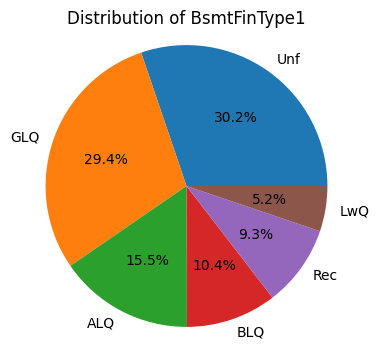

In [218]:
# create a figure
plt.figure(figsize=(4,4))
# calculate the percentage of each value
BsmtFinType1_counts = data['BsmtFinType1'].value_counts()
BsmtFinType1_percent = BsmtFinType1_counts / len(data)
# draw the pie plot
plt.pie(BsmtFinType1_percent, labels = BsmtFinType1_percent.index, autopct = "%.1f%%", startangle = 0)
# add title
plt.title('Distribution of BsmtFinType1')
# display the plot
plt.axis('equal')
plt.show()
# release the memory
del BsmtFinType1_counts
del BsmtFinType1_percent

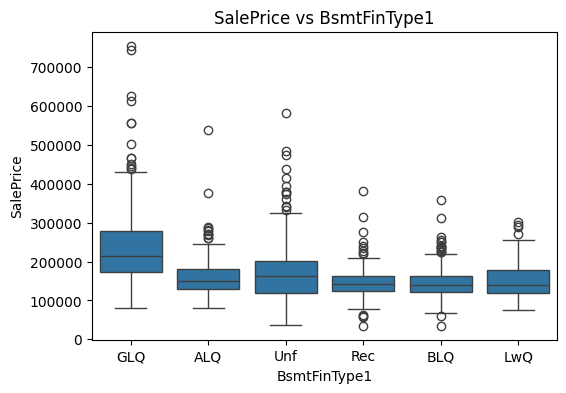

In [219]:
# create a figure
plt.figure(figsize=(6,4))
# draw the box plot
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = data)
# add title and labels
plt.title('SalePrice vs BsmtFinType1')
plt.xlabel('BsmtFinType1')
plt.ylabel('SalePrice')
# display the plot
plt.show()

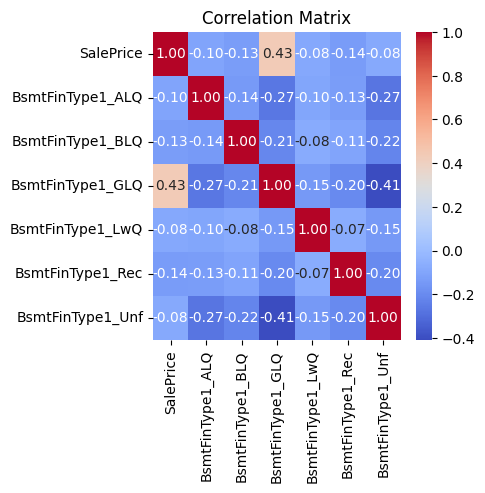

In [220]:
# check the multicollinearity
data_copy = data.copy()
data_copy = pd.get_dummies(data_copy[['BsmtFinType1','SalePrice']], drop_first = False)
corr = data_copy.corr()
# create a figure
plt.figure(figsize=(4, 4))
# draw the heatmap
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = 'coolwarm')
# add title
plt.title('Correlation Matrix')
# display the plot
plt.show()
# release the memory
del data_copy
del corr

# 35
BsmtFinSF1

In [221]:
print(data['BsmtFinSF1'].nunique(), '\n', data['BsmtFinSF1'].value_counts())

637 
 BsmtFinSF1
0       467
24       12
16        9
686       5
936       5
       ... 
203       1
309       1
408       1
1282      1
548       1
Name: count, Length: 637, dtype: int64


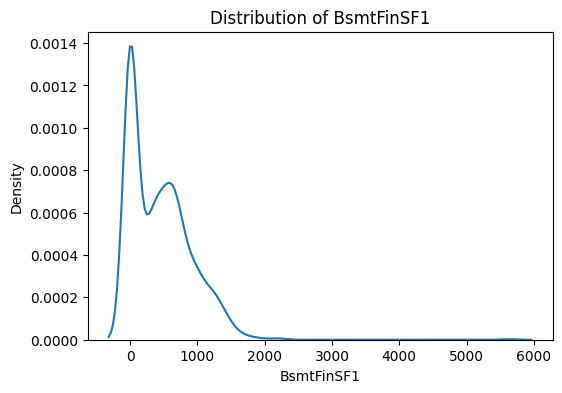

In [222]:
# create a figure
plt.figure(figsize=(6,4))
# draw the kde plot
sns.kdeplot(data = data, x = 'BsmtFinSF1')
# add title
plt.title('Distribution of BsmtFinSF1')
# display the plot
plt.show()

In [223]:
# check the correlation
corr = data[['BsmtFinSF1', 'SalePrice']].corr().iloc[0, 1]
# print the correlation
print(corr)
# release the memory
del corr

0.3864198062421535


# 36
BsmtFinType2

In [224]:
print(data['BsmtFinType2'].nunique(), '\n', data['BsmtFinType2'].value_counts())

6 
 BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64


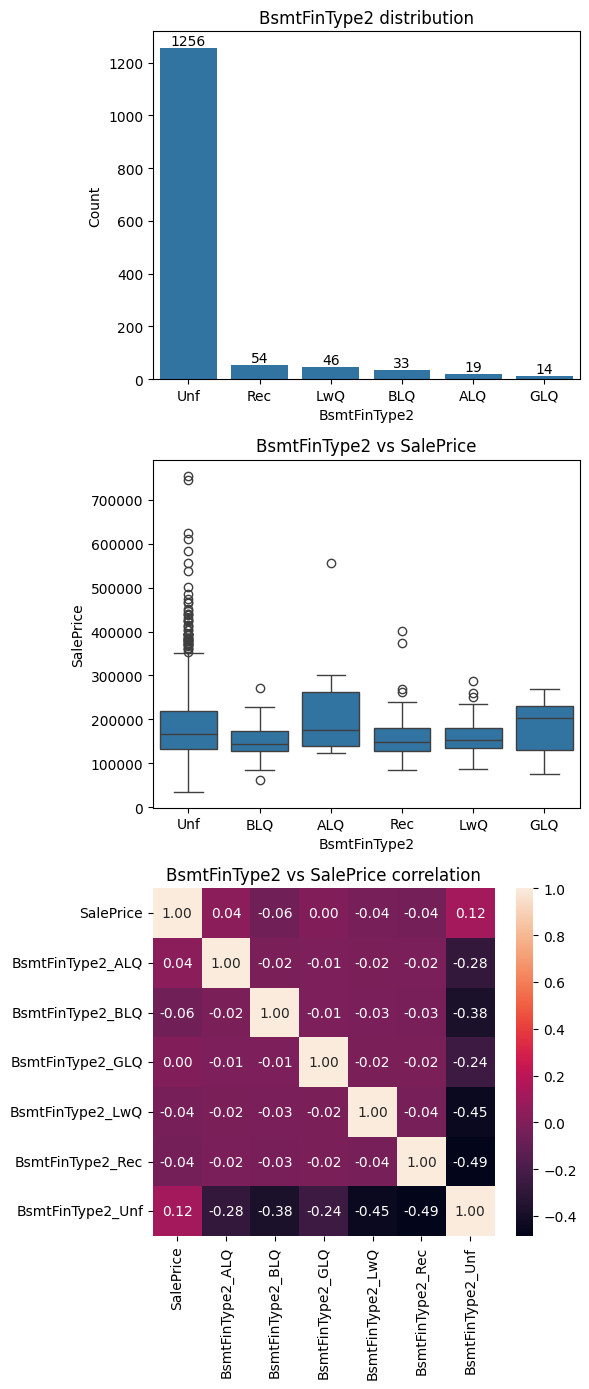

In [241]:
plot_attributes('BsmtFinType2')

# 37
BsmtFinSF2

<Figure size 600x400 with 0 Axes>

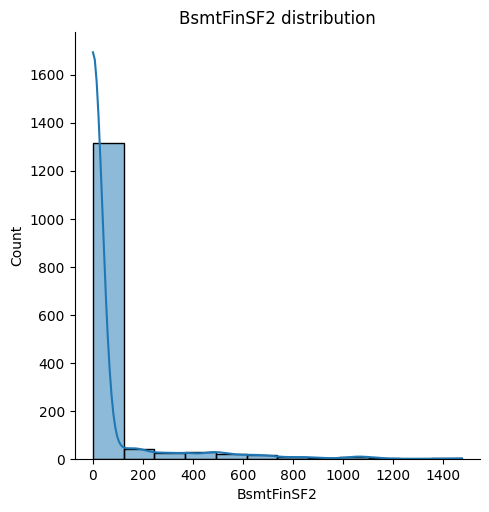

-0.011378121450215146


In [242]:
plot_attributes('BsmtFinSF2')

# 38
BsmtUnfSF

<Figure size 600x400 with 0 Axes>

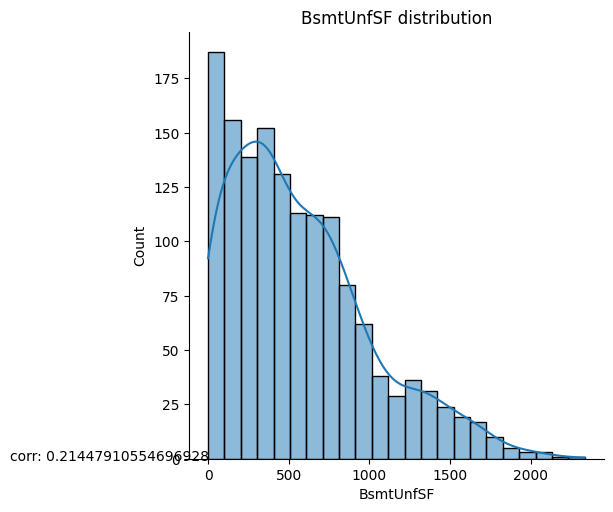

In [256]:
plot_attributes('BsmtUnfSF')